In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, scale
from sklearn.impute import SimpleImputer #, KNNImputer
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import LinearSVC, SVC
import plotly.graph_objs as go
from sklearn.metrics import classification_report, confusion_matrix #, plot_confusion_matrix,
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

In [2]:
pd.set_option("display.max_rows", 200, "display.max_columns", 50)
RS=42

In [3]:
signal = pd.read_csv('signal-data.csv')
print('Shape of the dataset:', signal.shape)
display(signal.head())

Shape of the dataset: (1567, 592)


,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,...,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,...,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,...,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,...,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,...,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
signal.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [5]:
col_obj = [i for i in signal.columns if signal[i].dtype=='O']
col_obj

['Time']

In [6]:
signal['Time'].nunique()

1534

Time feature is useless, so we can drop it from the dataset

Also Pass/Fail column can be modified slightly for better clarity

In [7]:
signal.drop('Time',1,inplace=True)
signal.replace({-1: 0},inplace=True)
signal.rename(columns={"Pass/Fail": "Fail",},inplace=True)
# Thus, Fail ==0, means product failed, else passed
signal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,...,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,...,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,...,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,...,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,...,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


#### Percentage of missing values in all the features

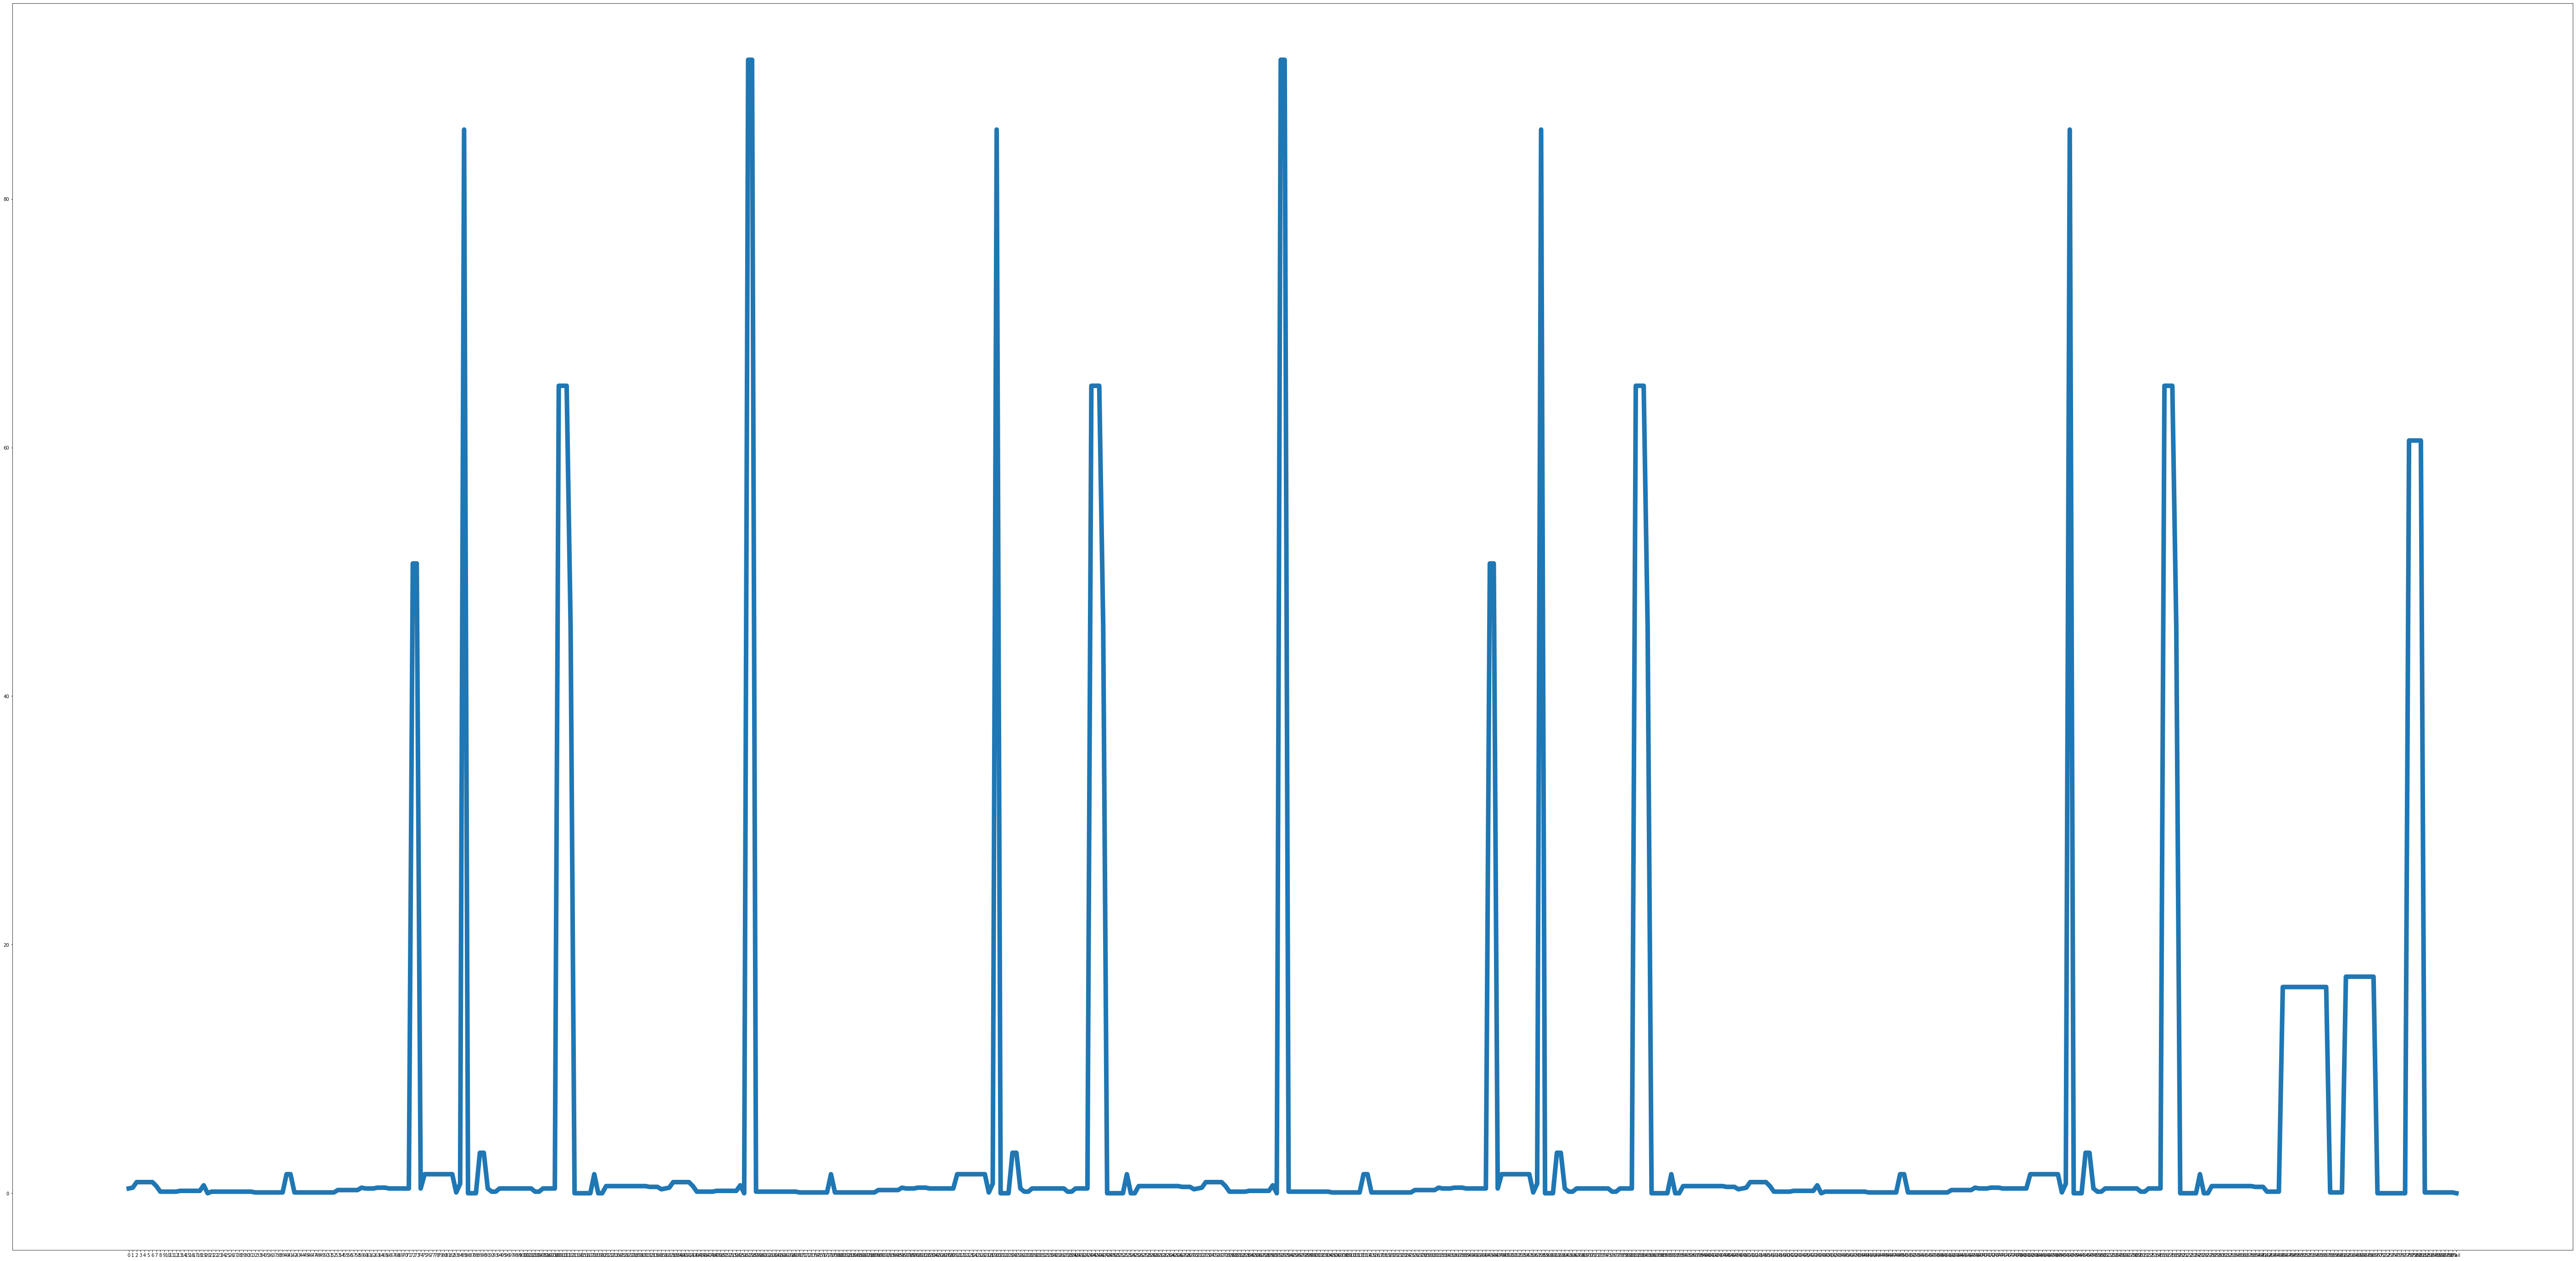

In [8]:
df = signal.isna().sum()*100/signal.shape[0]

plt.subplots(figsize=(100, 50))
fig = plt.plot(df)
plt.setp(fig, linewidth = 10)
plt.show()

There are features with large number of missing values (upto 91%), which needs to be handled

#### Percentage of missing values in all the features

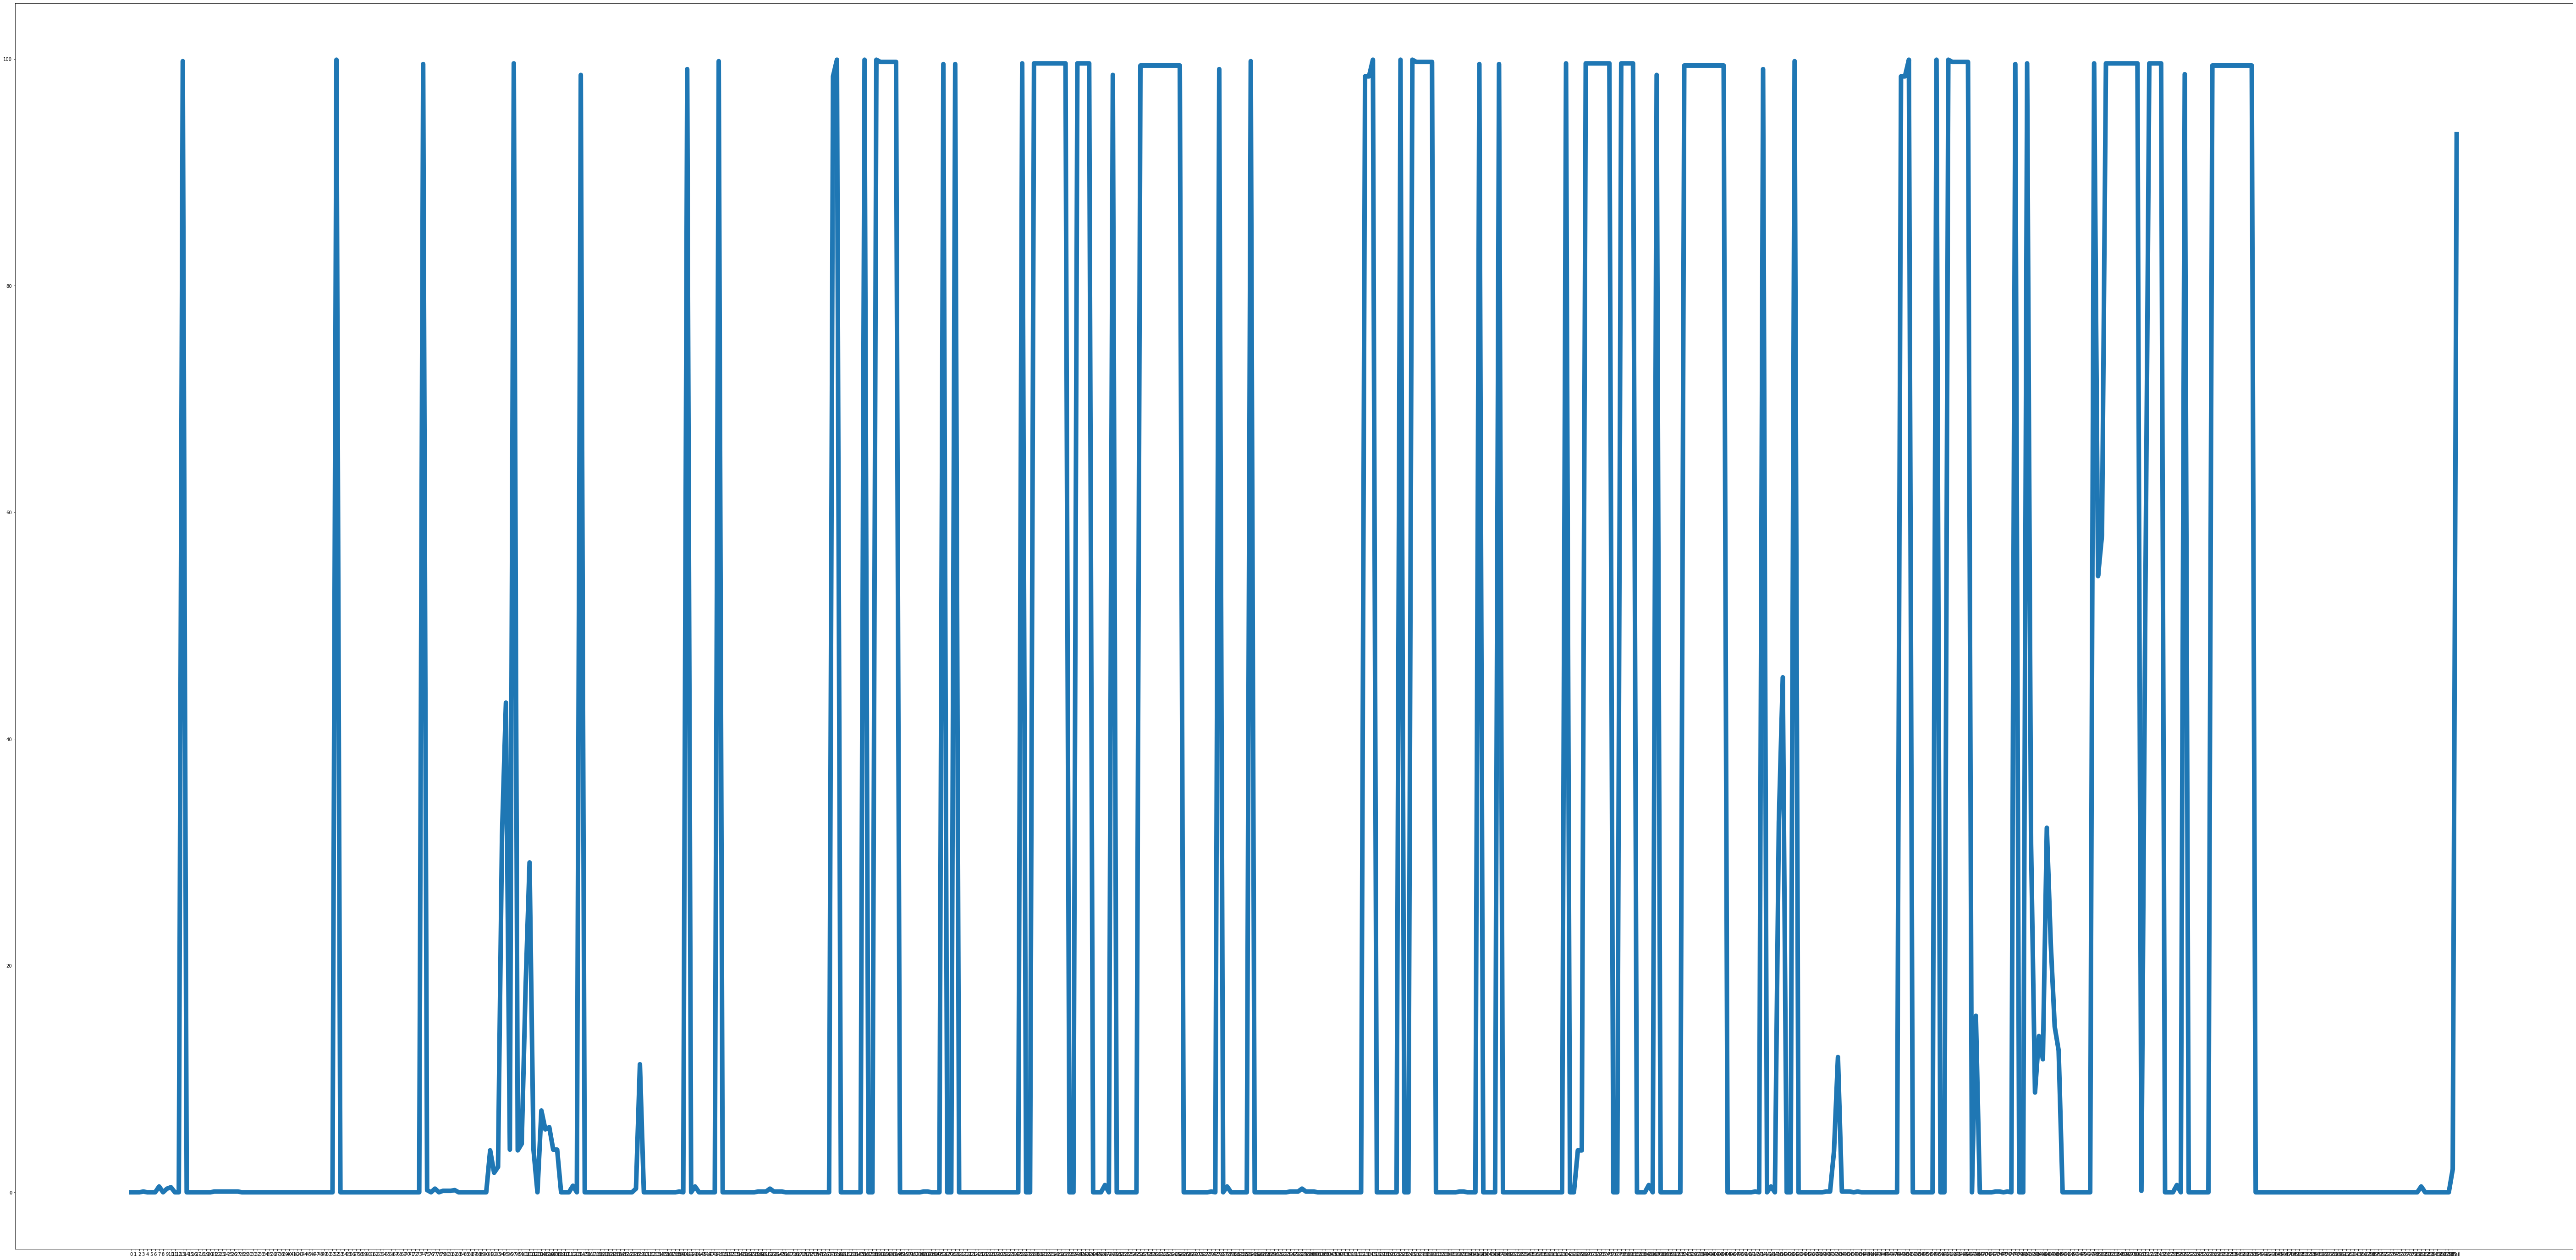

In [9]:
df = (signal == 0).sum()*100/signal.shape[0]

plt.subplots(figsize=(100, 50))
fig = plt.plot(df)
plt.setp(fig, linewidth = 10)
plt.show()

Large number of zeros are present. Many features have only 1 value, i.e. 0 throughout

In [10]:
signal.var()

0         5420.167484
1         6465.399020
2          871.026144
3       195091.505178
4         3175.946899
            ...      
586          0.000153
587          0.000078
588          0.000008
589       8815.692532
Fail         0.062004
Length: 591, dtype: float64

<BarContainer object of 10 artists>

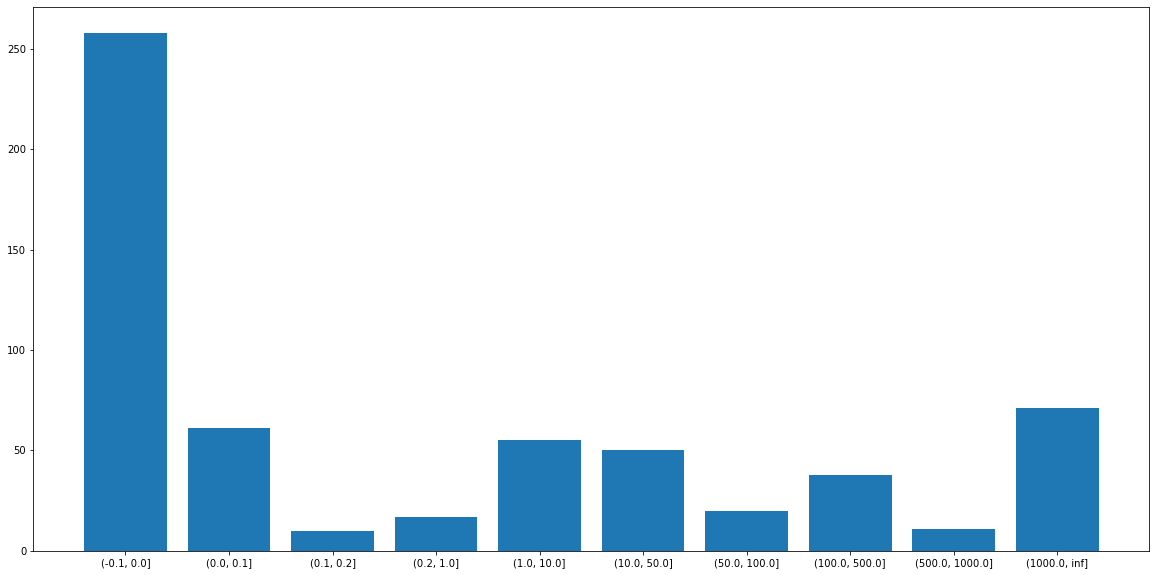

In [11]:
df = pd.cut(signal.var().round(2),[-0.1,0,0.1,0.2,1,10,50,100,500,1000,float('inf')]).value_counts().sort_index()
df.index = df.index.map(str)

plt.subplots(figsize=(20, 10))
plt.bar(x=df.index, height=df)

More than 250 features have extremely low variance (<0.1), thus having minimal contribution in the output

### Drop features with high missing values and low variance

In [12]:
# Collect features with missing values more than 30%
df = signal.isna().sum()*100/signal.shape[0]
missing_features = df[df>30].index.tolist()

# Collect features with variance less than or equal to 0.1
df = signal.drop('Fail',1).var().round(2)
low_var_features = df[df<=0.1].index.tolist()

# combine the list and remove them frm the main dataset
signal2 = signal.drop(np.unique(low_var_features + missing_features).tolist(),1)
print(f'There are {signal2.shape[0]} rows and {signal2.shape[1]} columns\n')
print(f'Features left: {round(signal2.shape[1]*100/signal.shape[1],2)}%\n')
signal2.head()

There are 1567 rows and 255 columns

Features left: 43.15%



,0,1,2,3,4,6,12,14,15,16,18,21,22,23,24,27,28,29,31,32,33,34,35,36,38,...,546,547,548,549,550,551,553,554,555,556,557,561,562,564,566,568,569,570,572,574,576,577,585,589,Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,192.3963,-5419.00,2916.50,-4043.75,751.00,3.0490,64.2333,2.0222,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,86.9555,...,1.0616,395.570,75.752,0.4234,12.93,0.78,5.7349,0.3363,39.8842,3.2687,1.0297,42.3877,NaN,NaN,NaN,NaN,NaN,533.8500,8.95,3.0624,1.6765,14.9509,2.3630,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,191.2872,-5441.50,2604.25,-3498.75,-1640.25,7.3900,68.4222,2.2667,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,87.5241,...,1.3526,408.798,74.640,0.7193,16.00,1.33,7.1196,0.4989,53.1836,3.9139,1.7819,18.1087,NaN,NaN,NaN,NaN,NaN,535.0164,5.92,2.0111,1.1065,10.9003,4.4447,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,192.7035,-5447.75,2701.75,-4047.00,-1916.50,7.5788,67.1333,2.3333,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,84.7327,...,0.7942,411.136,74.654,0.1832,16.16,0.85,7.1619,0.3752,23.0713,3.9306,1.1386,24.7524,267.064,1.10,0.4122,0.4119,68.8489,535.0245,11.21,4.0923,2.0952,9.2721,3.1745,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,422.2894,9.6924,192.1557,-5468.25,2648.25,-4515.00,-1657.25,7.3145,62.9333,2.6444,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,86.6867,...,1.1650,372.822,72.442,1.8804,131.68,39.33,56.9303,17.4781,161.4081,35.3198,54.2917,62.7572,268.228,7.32,3.5611,2.7290,25.0363,530.5682,9.33,2.8971,1.7585,8.5831,2.0544,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.9424,10.5661,420.5925,10.3387,191.6037,-5476.25,2635.25,-3987.50,117.00,7.2748,62.8333,3.1556,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,86.1468,...,1.4636,399.914,79.156,1.0388,19.63,1.98,9.7608,0.8311,70.9706,4.9086,2.5014,22.0500,NaN,NaN,NaN,NaN,NaN,532.0155,8.83,3.1776,1.6597,10.9698,99.3032,73.8432,0


### Checking for multicollinearity

<BarContainer object of 7 artists>

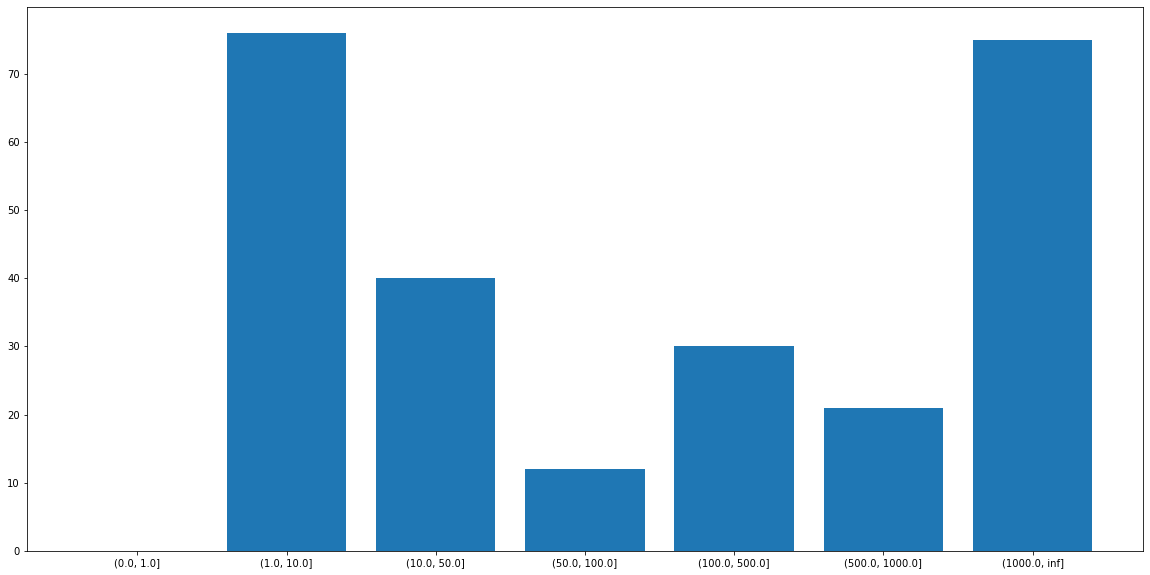

In [13]:
df = signal2.drop('Fail',1)
vif = pd.Series(np.linalg.inv(df.corr().values).diagonal(),index=df.columns,
          name='VIF').abs().sort_values(ascending=False).round(2)
df = pd.cut(vif.round(1),[0,1,10,50,100,500,1000,float('inf')]).value_counts().sort_index()
df.index = df.index.map(str)

plt.subplots(figsize=(20, 10))
plt.bar(x=df.index, height=df)

 There are several highly multicollinear (high vif value) features. Generally vif>10 is considered as high. Let's remove these features as well

In [14]:
def capture_vif(df,limit):
    high_vif = []
    while 1:
        temp_vif = pd.Series(np.linalg.inv(df.corr().values).diagonal(),index=df.columns,
          name='VIF').abs().sort_values(ascending=False).round(2)
        maxi = temp_vif.max()
        if maxi>limit:
            high_vif = temp_vif[temp_vif == maxi].index.tolist()[0]
            df = df.drop(high_vif,1)
        else:
            return df
    return

### Drop features with high multicollinearity

In [15]:
signal3 = capture_vif(signal2,10)
print(f'There are {signal3.shape[0]} rows and {signal3.shape[1]} columns\n')
print(f'Overall Features left: {round(signal3.shape[1]*100/signal.shape[1],2)}%\n')
signal3.head(7)

There are 1567 rows and 145 columns

Overall Features left: 24.53%



,0,1,2,3,6,14,15,18,21,22,23,24,27,28,29,31,32,33,35,36,38,39,40,41,43,...,521,523,525,526,527,539,540,541,545,546,547,548,551,553,555,561,562,568,569,570,574,577,585,589,Fail
0,3030.93,2564.00,2187.7333,1411.1265,97.6133,7.9558,414.8710,192.3963,-5419.00,2916.50,-4043.75,751.00,3.0490,64.2333,2.0222,3.5191,83.3971,9.5126,64.2588,49.3830,86.9555,117.5132,61.29,4.515,352.7173,...,0.0,0.1094,3.1406,0.5064,6.6926,2.0570,4.0825,11.5074,7.116,1.0616,395.570,75.752,0.78,5.7349,39.8842,42.3877,NaN,NaN,NaN,533.8500,3.0624,14.9509,2.3630,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,102.3433,10.1548,414.7347,191.2872,-5441.50,2604.25,-3498.75,-1640.25,7.3900,68.4222,2.2667,3.4171,84.9052,9.7997,64.2828,49.3404,87.5241,118.1188,78.25,2.773,352.2445,...,0.0,0.0673,3.1310,0.8832,8.8370,1.7910,2.9799,9.5796,7.116,1.3526,408.798,74.640,1.33,7.1196,53.1836,18.1087,NaN,NaN,NaN,535.0164,2.0111,10.9003,4.4447,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,95.4878,9.5157,416.7075,192.7035,-5447.75,2701.75,-4047.00,-1916.50,7.5788,67.1333,2.3333,3.5986,84.7569,8.6590,64.1114,49.8470,84.7327,118.6128,14.37,5.434,364.3782,...,0.0,0.0751,12.1831,0.6451,6.4568,2.1538,2.9667,9.3046,7.116,0.7942,411.136,74.654,0.85,7.1619,23.0713,24.7524,267.064,0.4119,68.8489,535.0245,4.0923,9.2721,3.1745,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,104.2367,9.6052,422.2894,192.1557,-5468.25,2648.25,-4515.00,-1657.25,7.3145,62.9333,2.6444,3.3813,84.9105,8.6789,64.1125,49.4900,86.6867,117.0442,76.90,1.279,363.0273,...,0.0,0.0977,6.7553,0.7404,6.4865,2.1565,3.2465,7.7754,7.116,1.1650,372.822,72.442,39.33,56.9303,161.4081,62.7572,268.228,2.7290,25.0363,530.5682,2.8971,8.5831,2.0544,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,100.3967,10.5661,420.5925,191.6037,-5476.25,2635.25,-3987.50,117.00,7.2748,62.8333,3.1556,3.2728,86.3269,8.7677,64.1511,49.7520,86.1468,121.4364,76.39,2.209,353.3400,...,0.0,0.0616,2.9954,2.2181,6.3745,2.0579,1.9999,9.4805,7.116,1.4636,399.914,79.156,1.98,9.7608,70.9706,22.0500,NaN,NaN,NaN,532.0155,3.1776,10.9698,99.3032,73.8432,0
5,2946.25,2432.84,2233.3667,1326.5200,100.3967,8.6617,414.2426,191.2280,-6058.00,2953.75,-3906.50,193.75,3.0505,62.3778,1.6333,3.5200,85.4233,9.6484,64.0720,49.4205,87.0273,117.4928,59.94,3.024,360.2873,...,0.0,0.0706,4.4060,2.9077,7.0970,1.7910,2.9799,9.5796,7.116,1.2708,412.222,80.326,1.65,7.2448,86.9463,30.6277,254.006,1.8700,22.5598,534.2091,2.2598,13.7755,3.8276,44.0077,0
6,3030.27,2430.12,2230.4222,1463.6606,102.3433,9.0350,415.8852,192.0912,-6154.00,2691.75,-3914.75,580.25,3.0515,60.8000,2.4889,3.4927,87.1543,9.1502,64.2476,49.7153,86.3740,121.8664,74.46,3.978,352.1836,...,0.0,0.0988,4.7340,0.5157,8.4653,1.4336,2.9239,7.5762,7.116,0.5051,404.356,72.040,0.87,5.4711,29.4773,51.4535,NaN,NaN,NaN,541.9036,2.2019,8.3645,2.8515,44.0077,0


In [16]:
df=((signal3 == 0).sum() + signal3.isna().sum())*100/signal3.shape[0]

#### Percentage of missing values and NaN in all the features

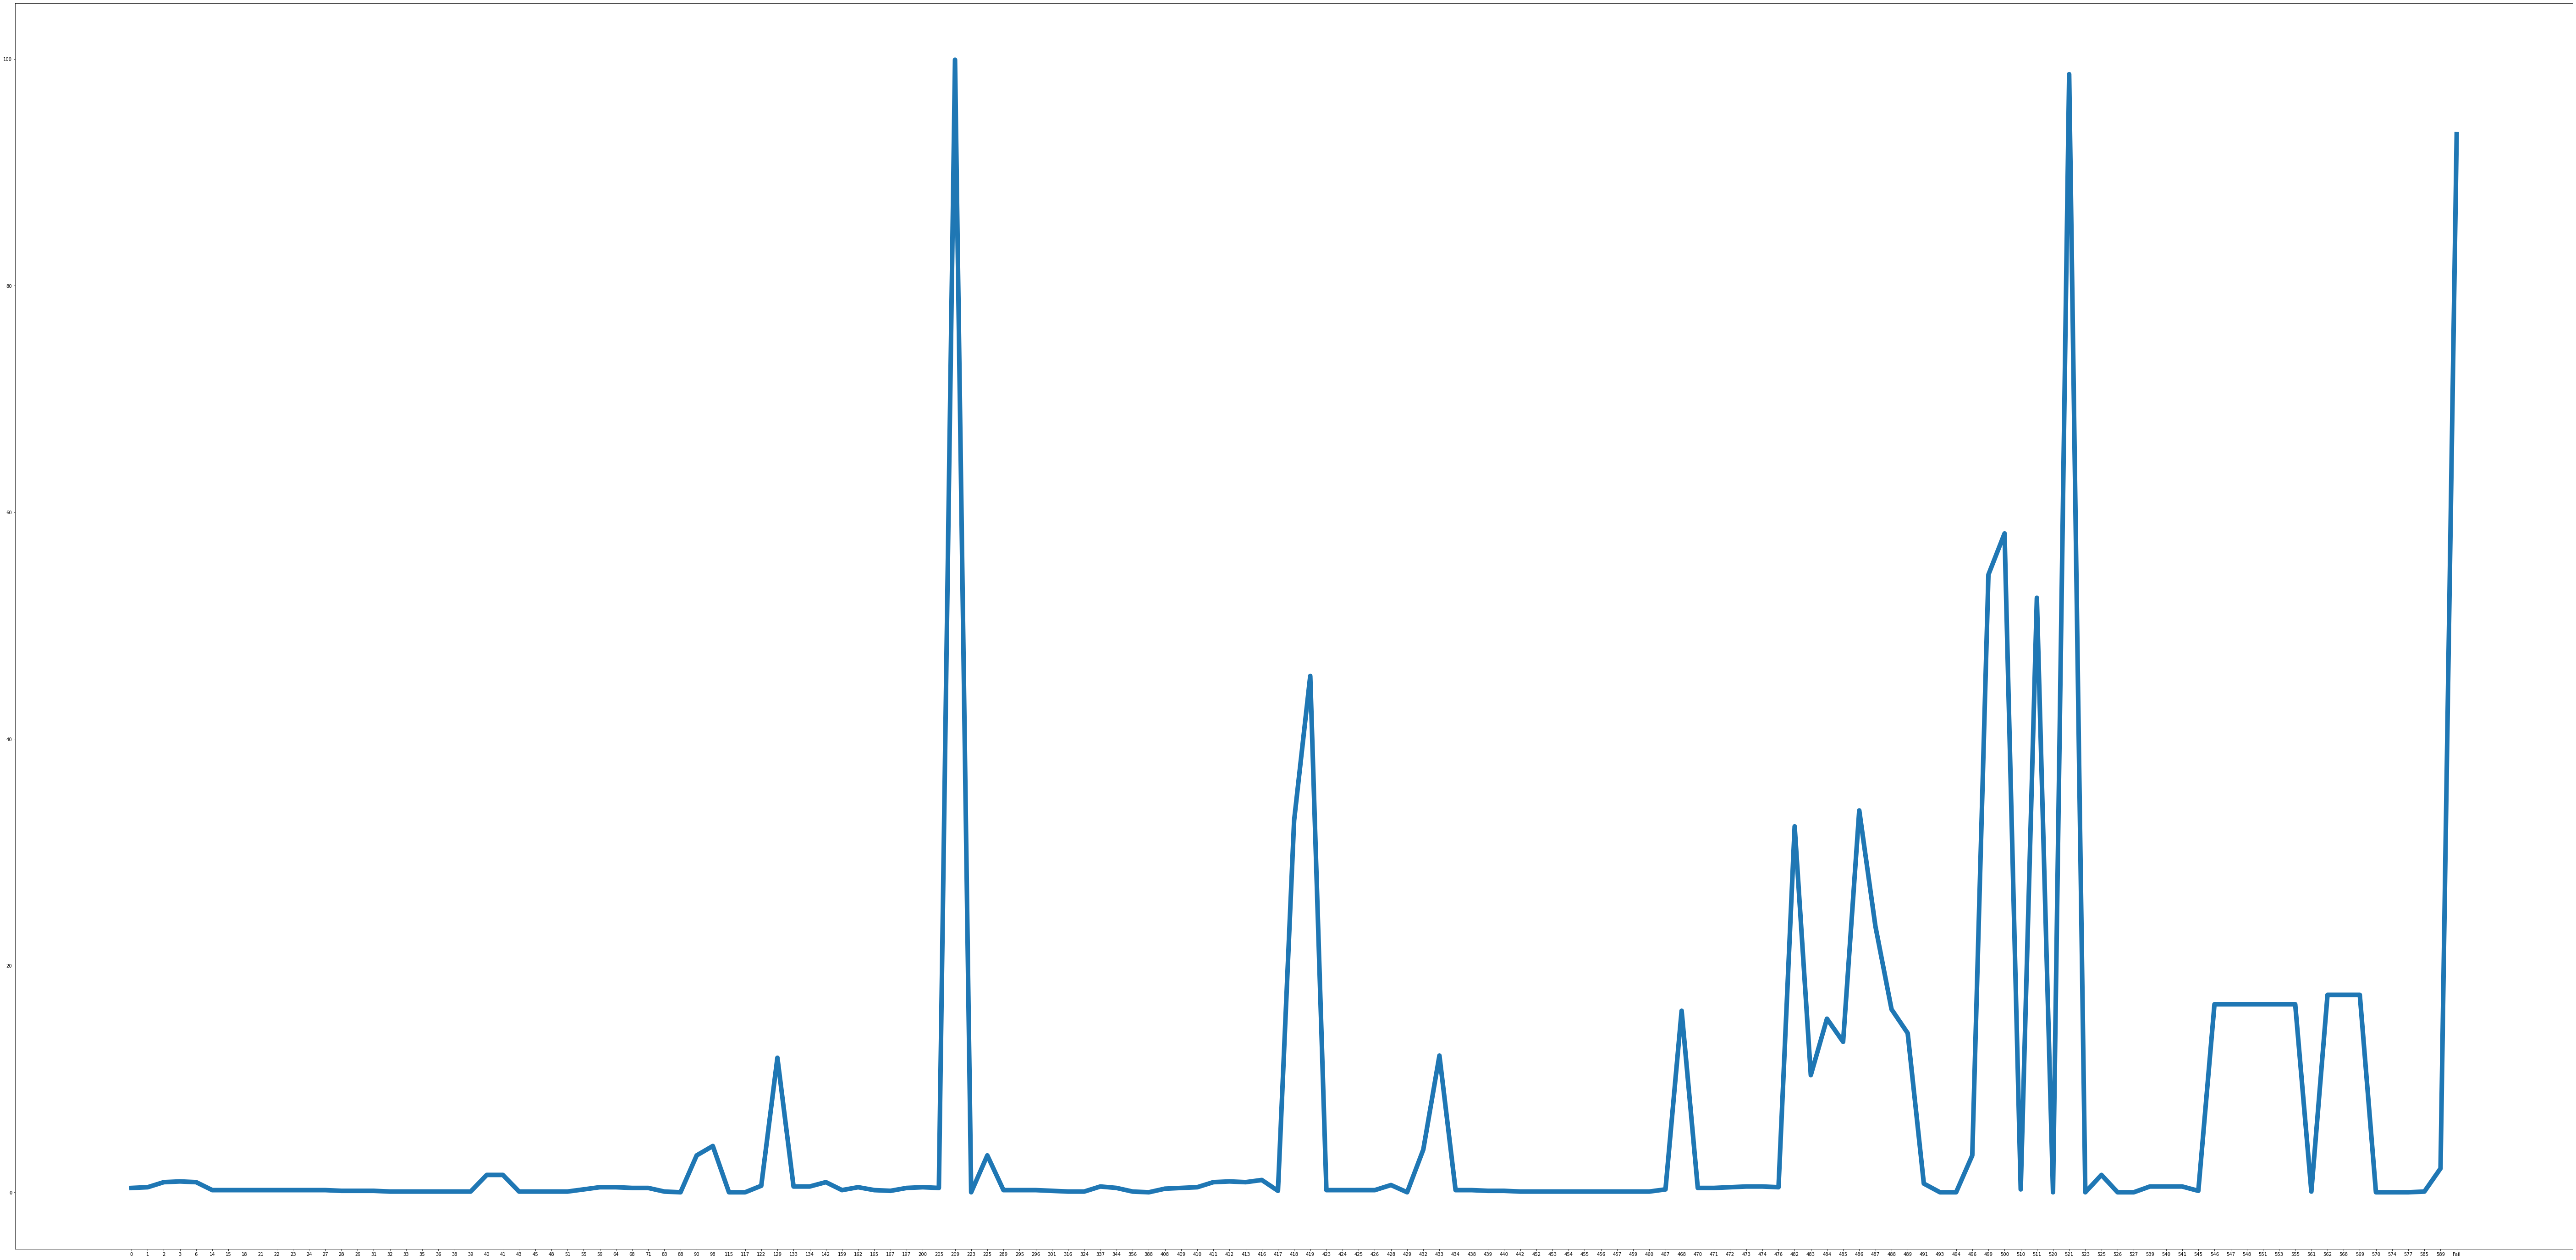

In [17]:
df=((signal3 == 0).sum() + signal3.isna().sum())*100/signal3.shape[0]

plt.subplots(figsize=(100, 50))
fig = plt.plot(df)
plt.setp(fig, linewidth = 10)
plt.show()

In [18]:
df = signal3.drop('Fail',1).nunique()
Drop = df[df<=20]
Drop

209    2
521    9
dtype: int64

These two are the same features, which have high zeros, as shown in the previous plotly graph

These two features offer no value in terms of predicting target column.

Let's also check if any other features is dominated by any value other than zero

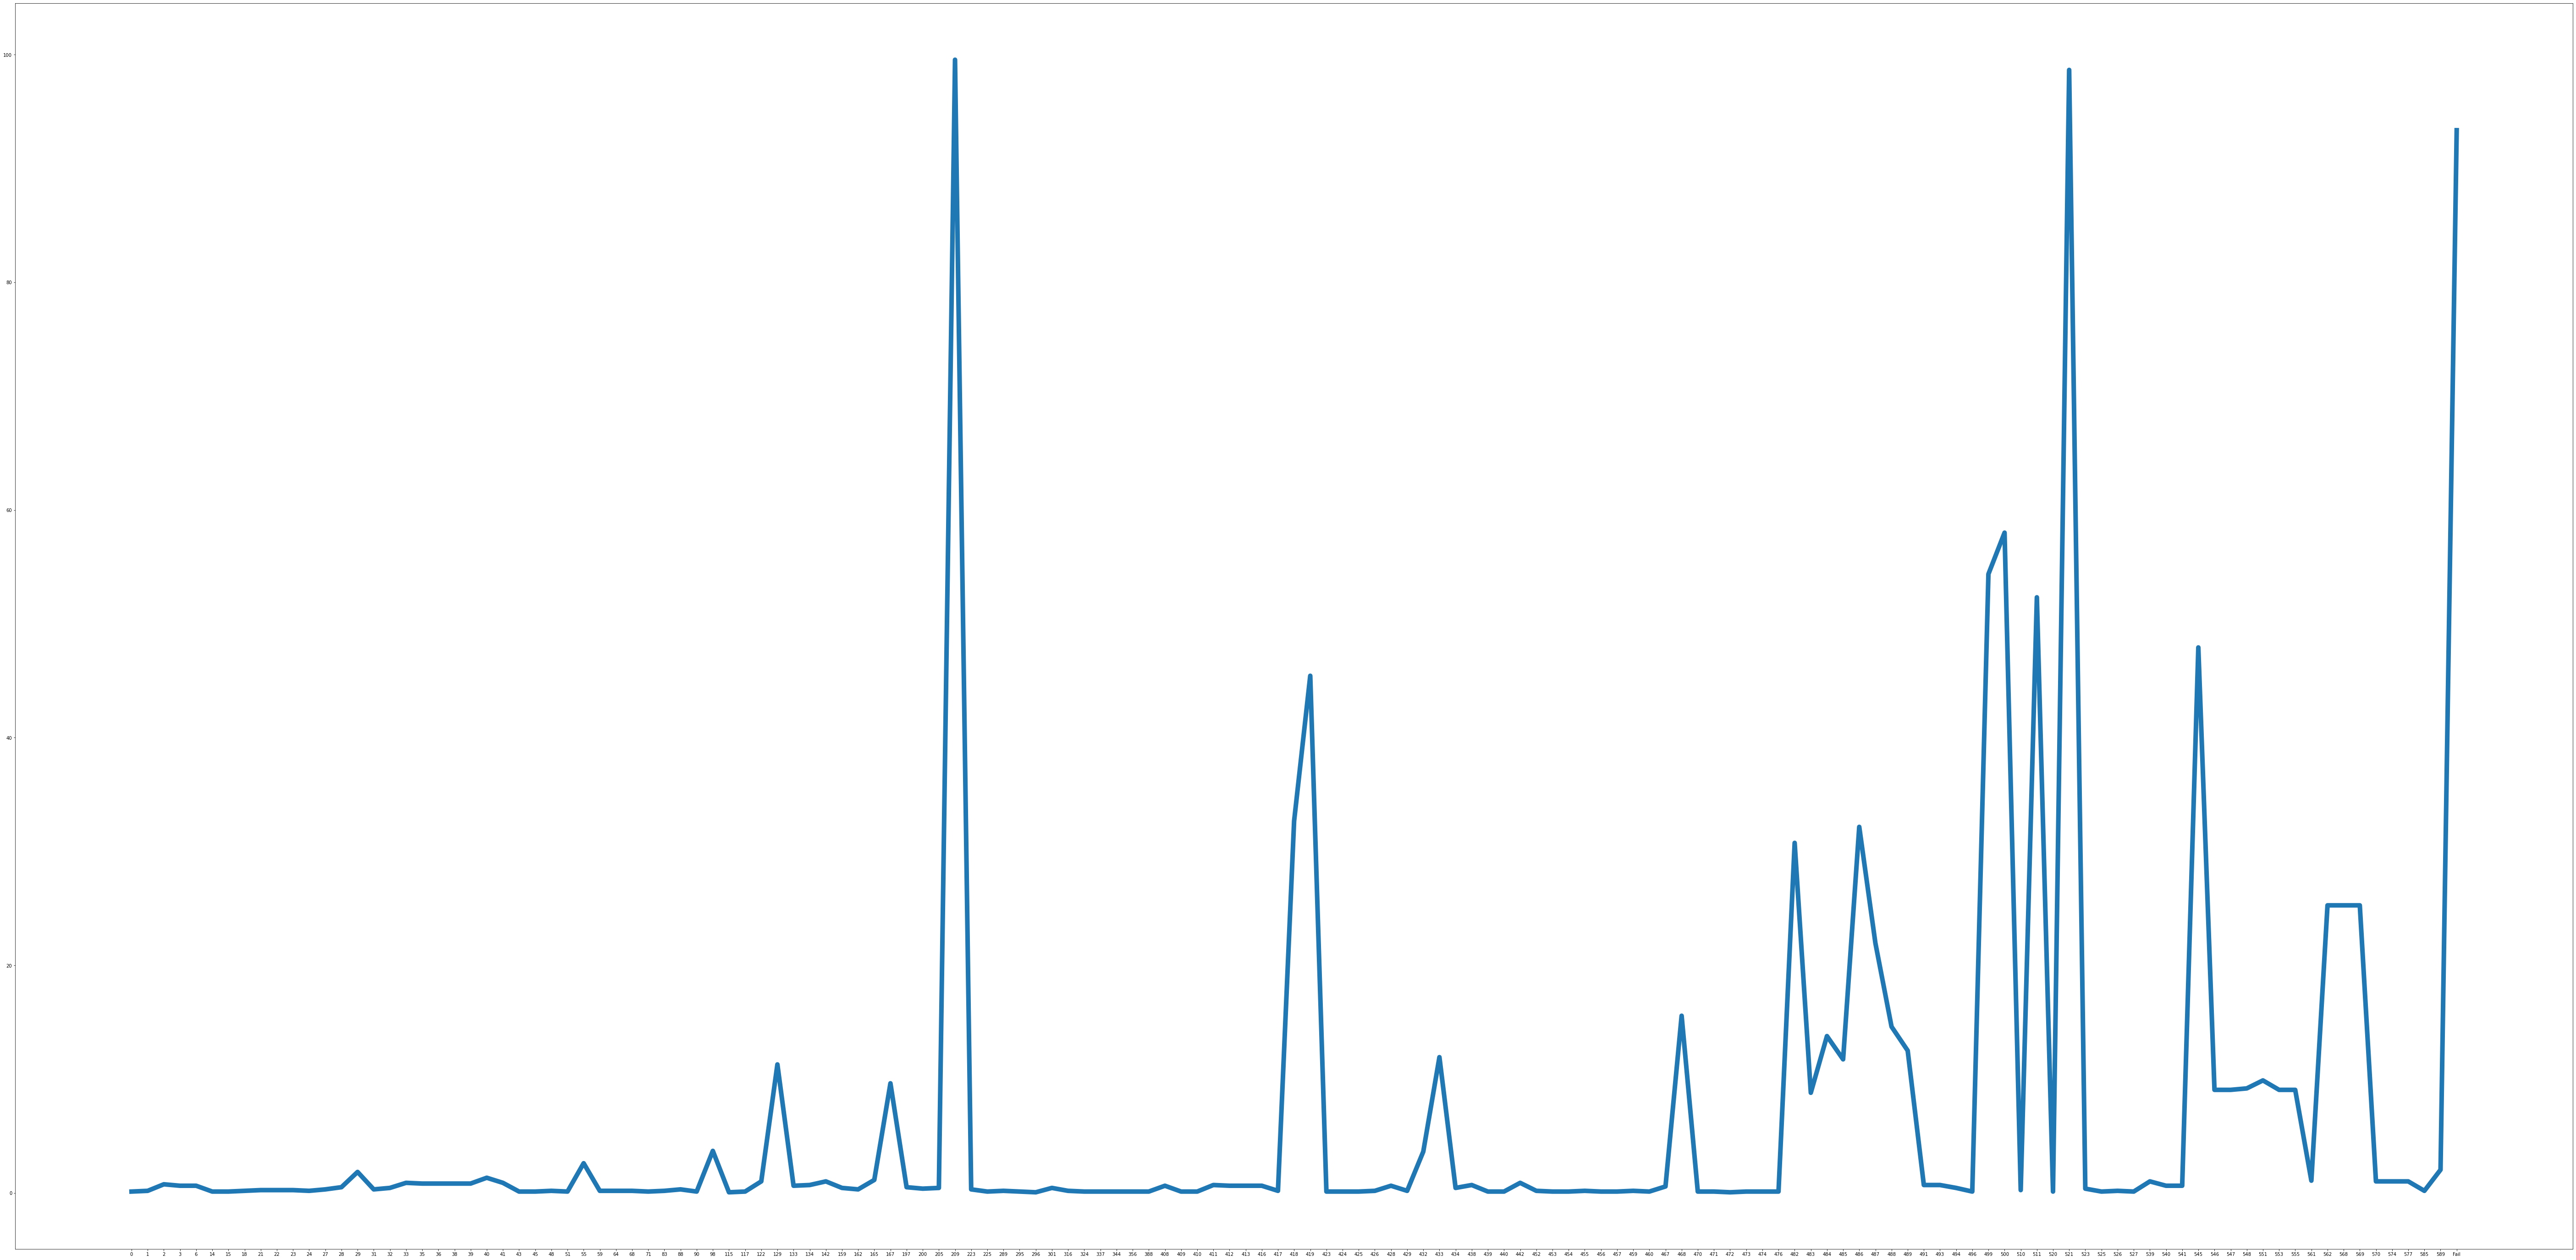

In [19]:
df = signal3.apply(pd.value_counts).max()*100/signal3.shape[0]

plt.subplots(figsize=(100, 50))
fig = plt.plot(df)
plt.setp(fig, linewidth = 10)
plt.show()

Thus, other than these two, no other feature is heavily dominated by a single value

#### Drop 2 features which are not adding any value

In [20]:
signal4=signal3.drop(Drop.index,1)
print(f'There are {signal4.shape[0]} rows and {signal4.shape[1]} columns\n')
print(f'Overall Features left: {round(signal4.shape[1]*100/signal.shape[1],2)}%\n')
signal4.head()

There are 1567 rows and 143 columns

Overall Features left: 24.2%



,0,1,2,3,6,14,15,18,21,22,23,24,27,28,29,31,32,33,35,36,38,39,40,41,43,...,520,523,525,526,527,539,540,541,545,546,547,548,551,553,555,561,562,568,569,570,574,577,585,589,Fail
0,3030.93,2564.00,2187.7333,1411.1265,97.6133,7.9558,414.8710,192.3963,-5419.00,2916.50,-4043.75,751.00,3.0490,64.2333,2.0222,3.5191,83.3971,9.5126,64.2588,49.3830,86.9555,117.5132,61.29,4.515,352.7173,...,1.9864,0.1094,3.1406,0.5064,6.6926,2.0570,4.0825,11.5074,7.116,1.0616,395.570,75.752,0.78,5.7349,39.8842,42.3877,NaN,NaN,NaN,533.8500,3.0624,14.9509,2.3630,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,102.3433,10.1548,414.7347,191.2872,-5441.50,2604.25,-3498.75,-1640.25,7.3900,68.4222,2.2667,3.4171,84.9052,9.7997,64.2828,49.3404,87.5241,118.1188,78.25,2.773,352.2445,...,1.6292,0.0673,3.1310,0.8832,8.8370,1.7910,2.9799,9.5796,7.116,1.3526,408.798,74.640,1.33,7.1196,53.1836,18.1087,NaN,NaN,NaN,535.0164,2.0111,10.9003,4.4447,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,95.4878,9.5157,416.7075,192.7035,-5447.75,2701.75,-4047.00,-1916.50,7.5788,67.1333,2.3333,3.5986,84.7569,8.6590,64.1114,49.8470,84.7327,118.6128,14.37,5.434,364.3782,...,2.9626,0.0751,12.1831,0.6451,6.4568,2.1538,2.9667,9.3046,7.116,0.7942,411.136,74.654,0.85,7.1619,23.0713,24.7524,267.064,0.4119,68.8489,535.0245,4.0923,9.2721,3.1745,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,104.2367,9.6052,422.2894,192.1557,-5468.25,2648.25,-4515.00,-1657.25,7.3145,62.9333,2.6444,3.3813,84.9105,8.6789,64.1125,49.4900,86.6867,117.0442,76.90,1.279,363.0273,...,2.4416,0.0977,6.7553,0.7404,6.4865,2.1565,3.2465,7.7754,7.116,1.1650,372.822,72.442,39.33,56.9303,161.4081,62.7572,268.228,2.7290,25.0363,530.5682,2.8971,8.5831,2.0544,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,100.3967,10.5661,420.5925,191.6037,-5476.25,2635.25,-3987.50,117.00,7.2748,62.8333,3.1556,3.2728,86.3269,8.7677,64.1511,49.7520,86.1468,121.4364,76.39,2.209,353.3400,...,2.5512,0.0616,2.9954,2.2181,6.3745,2.0579,1.9999,9.4805,7.116,1.4636,399.914,79.156,1.98,9.7608,70.9706,22.0500,NaN,NaN,NaN,532.0155,3.1776,10.9698,99.3032,73.8432,0


### Checking for skewness

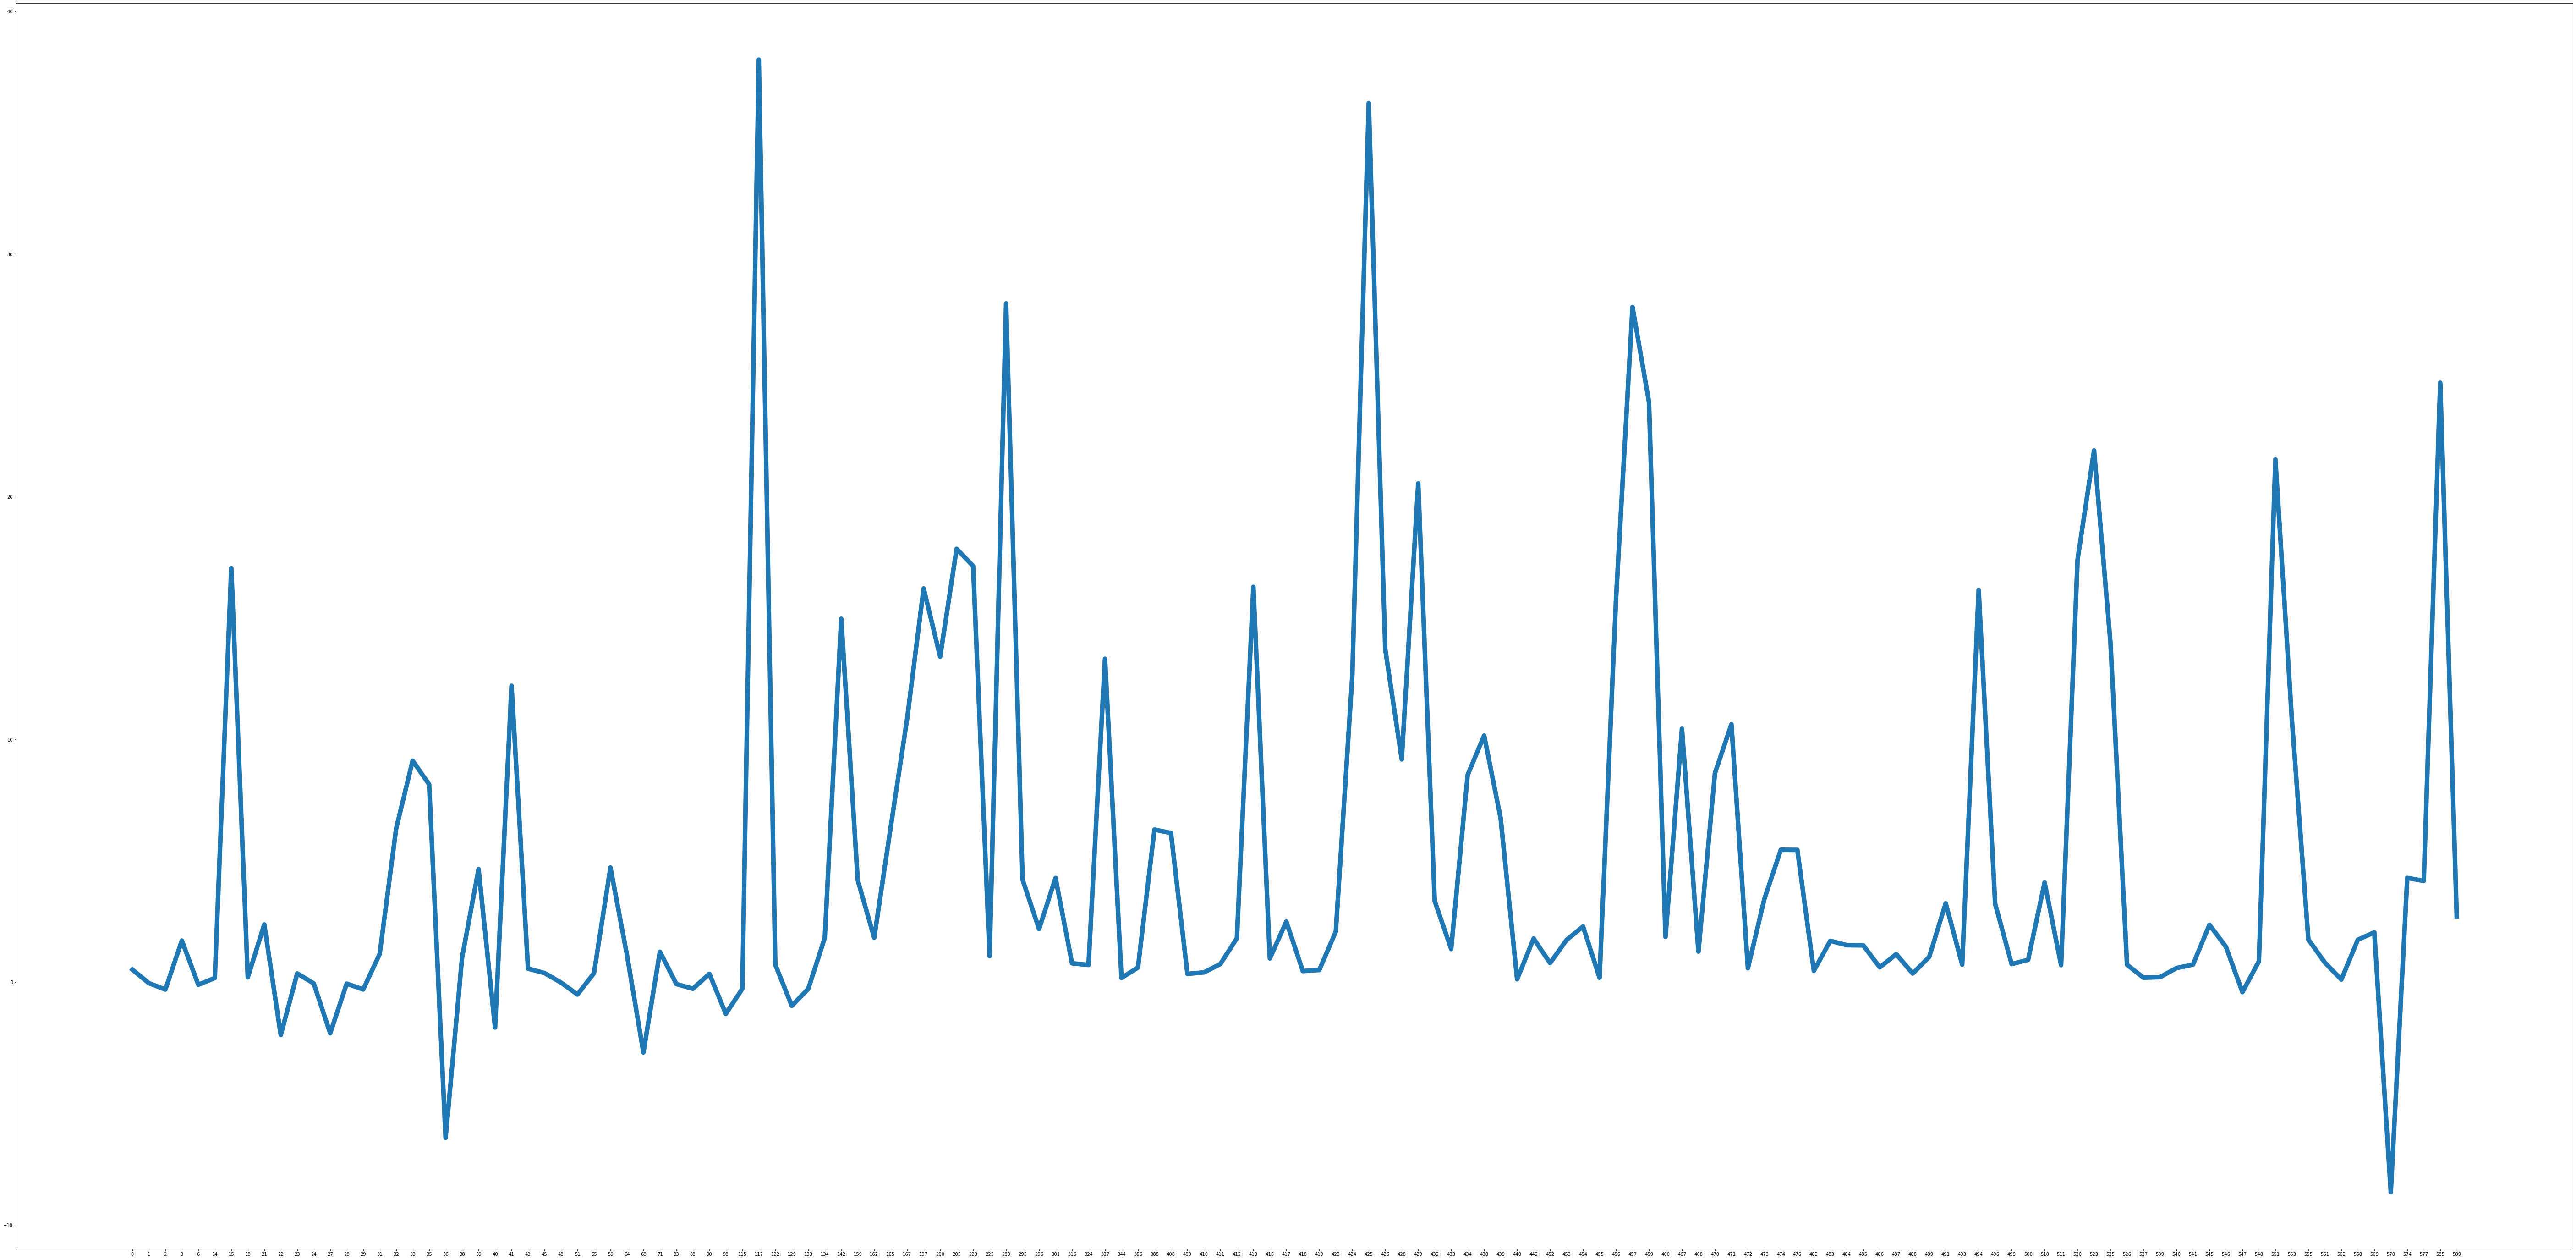

In [21]:
df = signal4.drop('Fail',1).skew()

plt.subplots(figsize=(100, 50))
fig = plt.plot(df)
plt.setp(fig, linewidth = 10)
plt.show()

<BarContainer object of 5 artists>

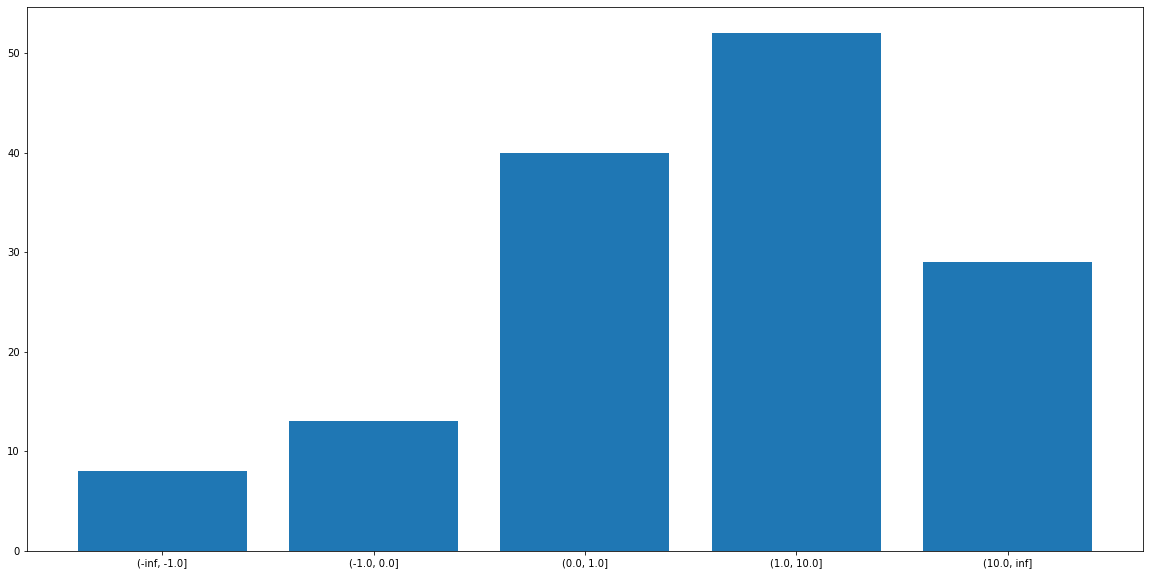

In [22]:
df = signal4.drop('Fail',1)
df = pd.cut(df.skew().round(1),[float('-inf'),-1,0,1,10,float('inf')]).value_counts().sort_index()
df.index = df.index.map(str)

plt.subplots(figsize=(20, 10))
plt.bar(x=df.index, height=df)

Generally, skewness of more than +1 or less than -1, is considered as high. In this case, skewness is extremely high, i.e. the distribution of many features are highly non-normal and are expected to have extreme outliers, which could affect the prediction accuracies of many classifiers

The skewness maybe because of potential outliers. 

### Percentage of Outliers in all the features

In [23]:
def IQR_outliers(data,limit=1.5):
    numColumns = data.select_dtypes(include=np.number).columns.tolist(); # extract list of numeric columns
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1;
    outliers=((data[numColumns] < (Q1 - limit*IQR)) | (data[numColumns] > (Q3 + limit*IQR))).sum()*100/data.shape[0]
    return outliers 

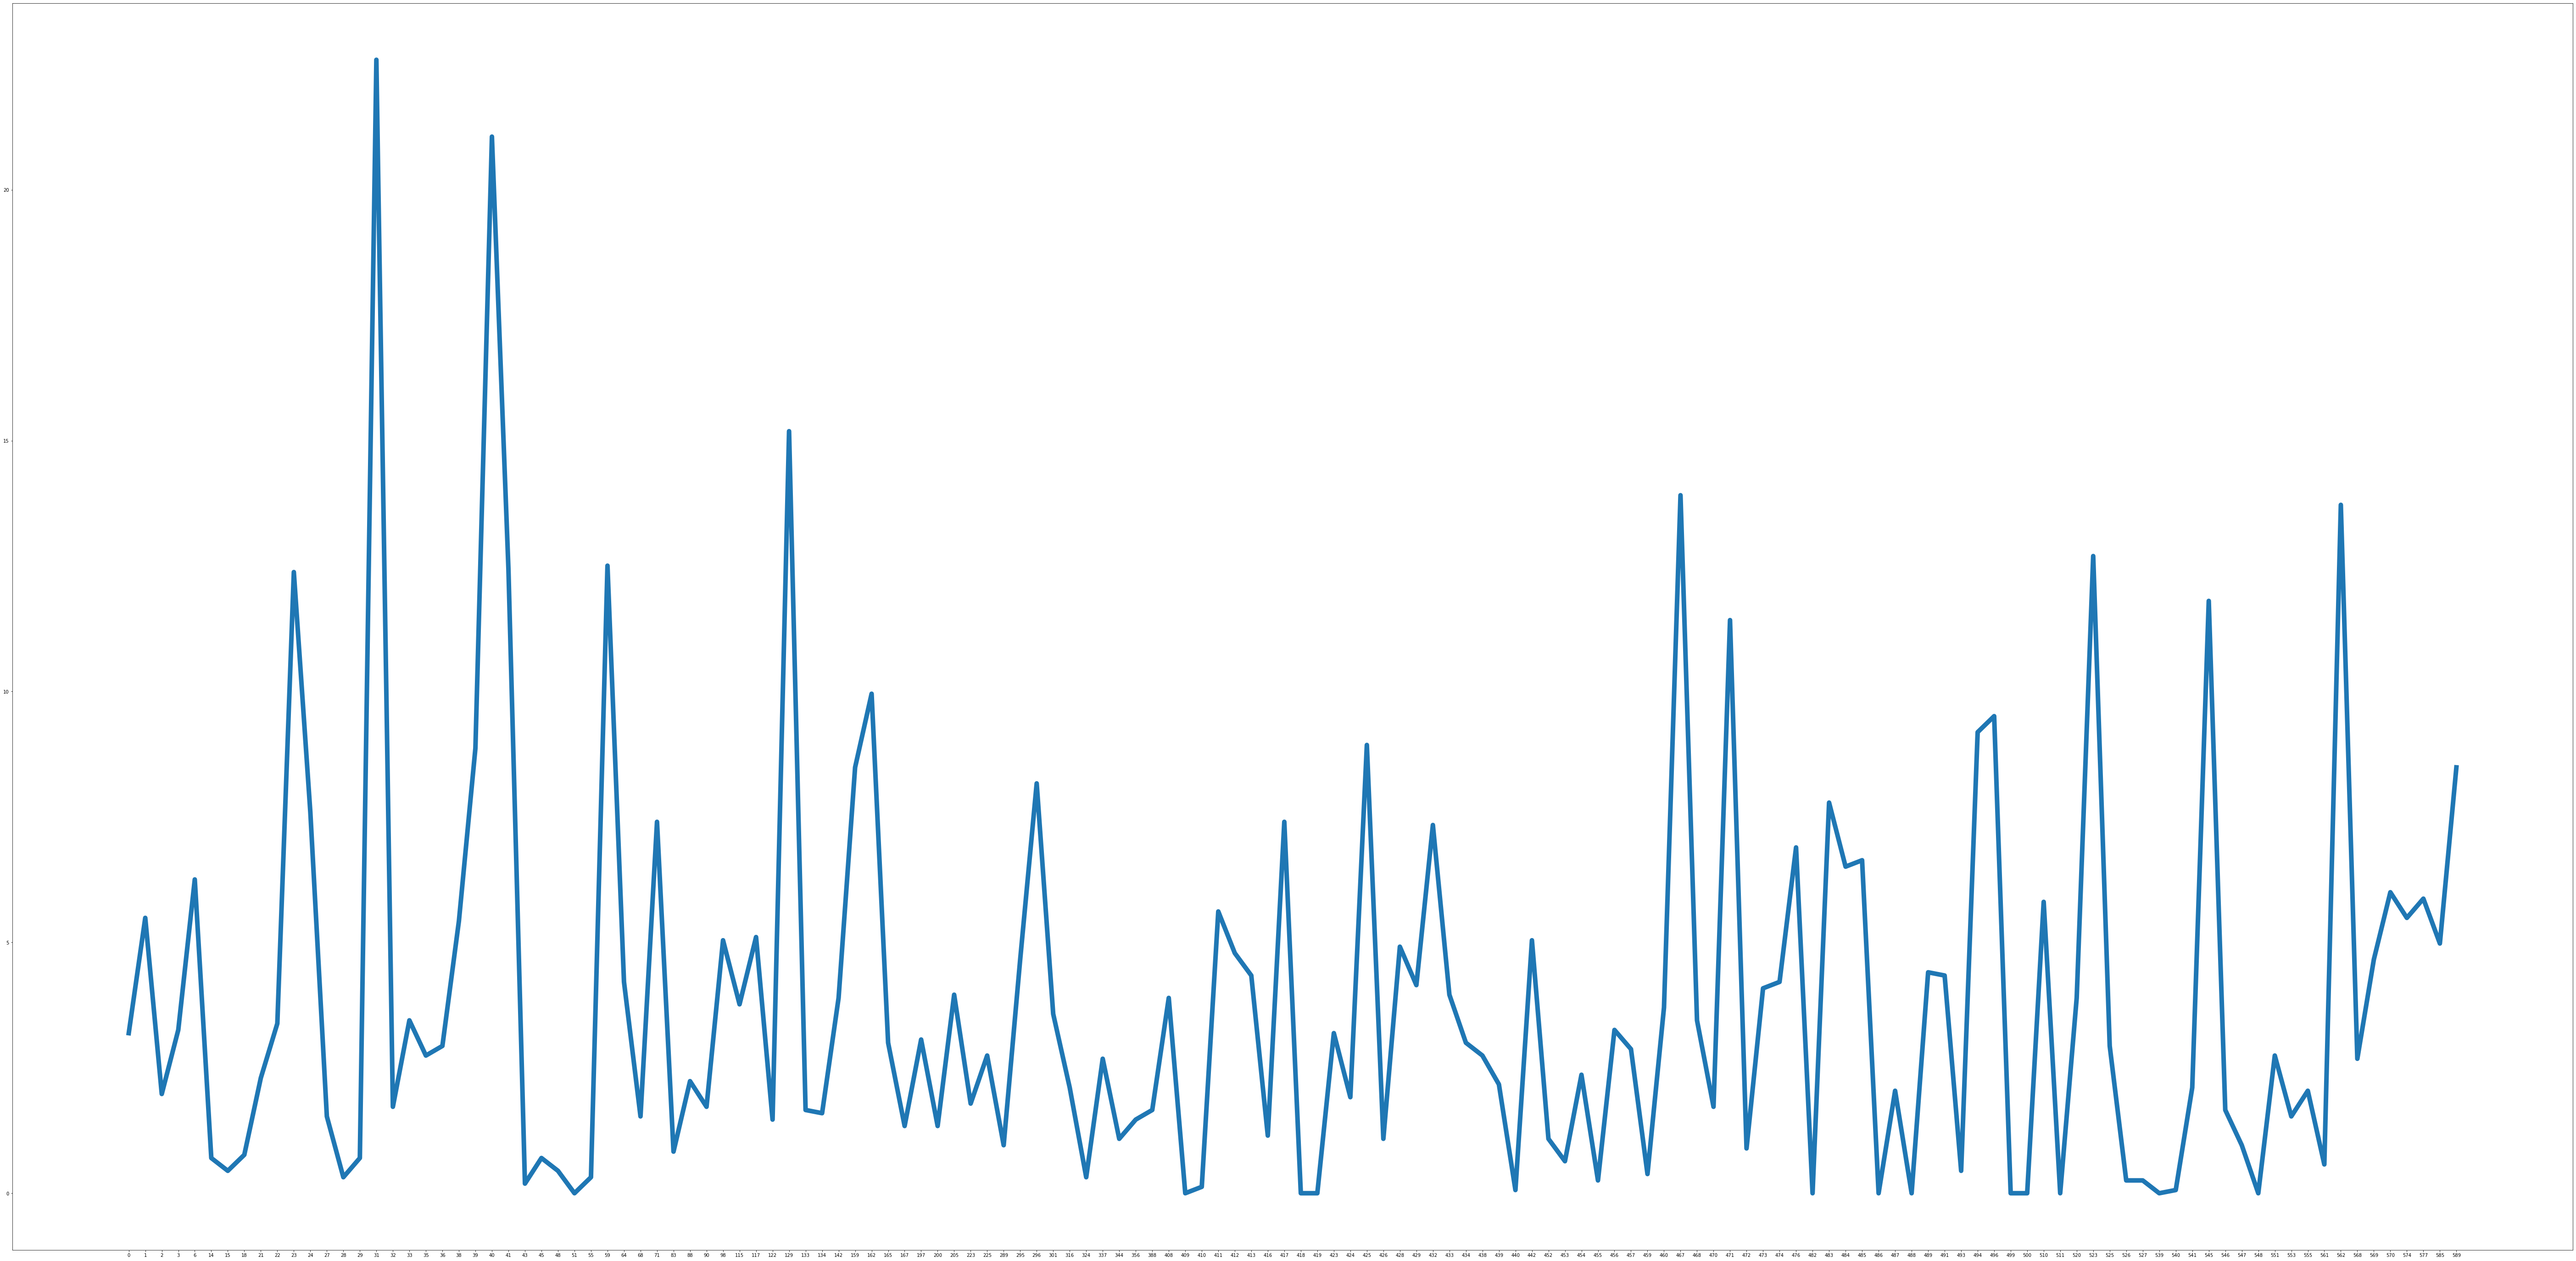

In [24]:
df = signal4.drop(['Fail'],1).copy()
outliers = IQR_outliers(df)

plt.subplots(figsize=(100, 50))
fig = plt.plot(outliers)
plt.setp(fig, linewidth = 10)
plt.show()

There are too many IQR outliers to remove. In case of removal, there is a possibility that the nature of data might change, gievn the small size of 'Fail' data. Thus it might be better to use a different strategy.

Let us use quantile transformation to handle Outliers

In [25]:
df = signal4.drop(['Fail'],1).copy()
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=RS)
df1 = pd.DataFrame(quantile_transformer.fit_transform(df),columns=df.columns)
outliers = IQR_outliers(df)
outliers1=IQR_outliers(df1)

All the outliers have been handled

### imputation (with 0) on main data

In [26]:
signal5 = signal4.replace(np.NaN, 0)
signal_X = signal5.drop('Fail',1)
Y = signal['Fail']

In [27]:
Y.value_counts()

0    1463
1     104
Name: Fail, dtype: int64

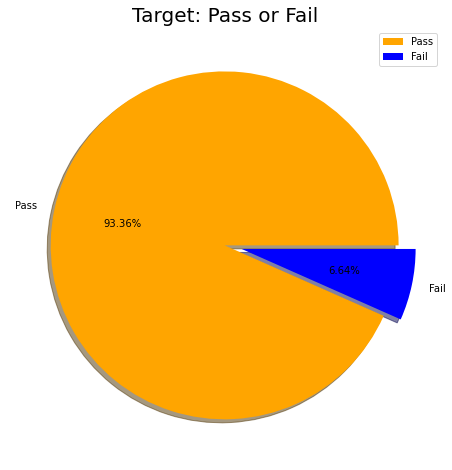

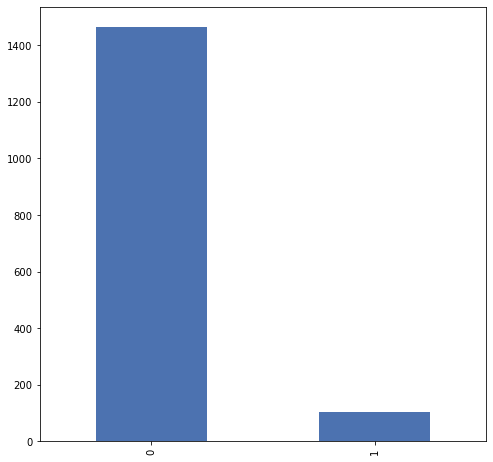

In [28]:
labels = ['Pass', 'Fail']
size = signal['Fail'].value_counts()
colors = ['orange', 'blue']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
signal['Fail'].value_counts().plot(kind="bar");

The dataset is highly imbalanced

## Model Building

In [29]:
def display_sbs(*args):
# Objective: To display dataframes side by side, for clearer and concise presentation
# Application: Simply pass two dataframes as arguments. * Works only for dataframes
    from IPython.display import display_html
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    return

### PCA

***Covariance matrix***

In [30]:
covMatrix = np.cov(scale(signal_X))

***Finding optimum value for n_components***

In [31]:
eig_vals, eig_vecs = np.linalg.eig(covMatrix)

print('Eigen vectors \n%s' %eig_vecs)
print('\nEigen values \n%s' %eig_vals)

Eigen vectors 
[[-0.03379666+0.j          0.01038676+0.j          0.001029  +0.j
  ...  0.02054667+0.00583053j  0.03176366+0.01388011j
   0.03176366-0.01388011j]
 [-0.01240142+0.j          0.01166233+0.j          0.00337195+0.j
  ...  0.00703836+0.00169194j  0.00377377+0.00027514j
   0.00377377-0.00027514j]
 [-0.00867152+0.j         -0.0040296 +0.j          0.01022463+0.j
  ... -0.00182878-0.00029404j  0.00803824-0.00091544j
   0.00803824+0.00091544j]
 ...
 [ 0.03256352+0.j         -0.01382025+0.j          0.07828815+0.j
  ... -0.00575298-0.00151179j -0.00648537-0.00334079j
  -0.00648537+0.00334079j]
 [ 0.0270483 +0.j         -0.00955458+0.j          0.01257075+0.j
  ...  0.00640765-0.00183972j  0.02593988-0.0144177j
   0.02593988+0.0144177j ]
 [ 0.03557511+0.j         -0.04488534+0.j          0.08027278+0.j
  ...  0.01221704+0.00253615j -0.00622753+0.00475985j
  -0.00622753-0.00475985j]]

Eigen values 
[ 6.62009761e+01+0.00000000e+00j  6.04503964e+01+0.00000000e+00j
  5.11333135e+01+0

***Sorting the eigen values in descending order***

In [32]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse = True)

print('Eigen values in descending order: ')
for i in eig_pairs:
    print(i[0])

Eigen values in descending order: 
66.20097607057009
60.450396391748484
51.13331349097618
45.98246157527483
40.95252504426788
37.56511542663155
33.0331409240815
31.258989672166017
29.50887855432595
26.22718562490918
25.321624406654387
24.835831551477117
22.74856824589289
22.56947144274349
21.7877935165506
21.377887221514314
20.407439516035684
20.005065641428168
19.45652490538454
19.188267819394653
17.894626155358885
17.421174283052782
17.219103841996553
17.120298583253277
16.37185087380549
16.035030663069325
15.656673827389575
15.467809081008118
15.383815746205466
14.909760592454306
14.598760447912051
14.408829592373277
13.947617092394752
13.867868343821712
13.655668346243502
13.393476038861273
13.308605173819489
13.036078267488545
12.838631241889862
12.701785650585162
12.609204935773107
12.313264539799391
12.255337361735602
11.975183959498466
11.845044032605951
11.792035570612201
11.612213052369592
11.578270115448689
11.394740270981252
11.299503763166676
11.185068773307698
11.14484604

***Variance captured calculation***

In [33]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance captured by each component is \n', var_exp)
print(50*'-')
print('Cumulative variance captured as we traverse each component \n', cum_var_exp)

Variance captured by each component is 
 [(4.261124997641734+0j), (3.8909803219161656+0j), (3.291272323483336+0j), (2.9597300236575927+0j), (2.6359706237058855+0j), (2.417934929132812+0j), (2.1262276011184156+0j), (2.0120316980085335+0j), (1.8993831741419152+0j), (1.688152092575756+0j), (1.6298642881801377+0j), (1.5985955033110906+0j), (1.464245673807003+0j), (1.4527178397750076+0j), (1.4024039690572312+0j), (1.376019736314078+0j), (1.3135554159646177+0j), (1.2876560187463602+0j), (1.252348372525425+0j), (1.2350816033211836+0j), (1.1518144196661044+0j), (1.1213399806470599+0j), (1.108333413995364+0j), (1.101973665500408+0j), (1.0537987074642006+0j), (1.0321187700241716+0j), (1.0077652654954017+0j), (0.9956087031643359+0j), (0.9902023463429296+0j), (0.9596890762099238+0j), (0.9396710860104058+0j), (0.9274459019663365+0j), (0.8977592684824383+0j), (0.8926261208123348+0j), (0.8789675500804448+0j), (0.8620911494366718+0j), (0.8566283090668332+0j), (0.8390867064799039+0j), (0.82637773289027

In [34]:
cum_var_exp

array([  4.261125  +0.00000000e+00j,   8.15210532+0.00000000e+00j,
        11.44337764+0.00000000e+00j, ..., 100.        +3.67131893e-17j,
       100.        +0.00000000e+00j, 100.        +0.00000000e+00j])

In [35]:
len(cum_var_exp[cum_var_exp<96])

105

105 elements capture about 95% of the variance

In [36]:
cv_scores=pd.DataFrame(index=['mean','std'])
scores = pd.DataFrame(index=['train','test','CV'])
def save_scores(name,cv,test,train):
    global cv_scores
    global scores
    cv_scores.loc['mean',name] = cv[0]
    cv_scores.loc['std',name] = cv[1]
    scores.loc['train',name] = train
    scores.loc['test',name] = test
    scores.loc['CV',name] = cv[0]
    return

#### Train test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(signal_X, Y, test_size=0.25, stratify=Y, random_state=RS)

In [38]:
Pca = PCA(n_components=105, random_state=RS, whiten=True) # to capture most important features with 95% variance
Smot = SMOTE(random_state=RS) # to handle imbalanced classes
Trans = QuantileTransformer(output_distribution='normal', random_state=RS) # Transformation to reduce outliers
MinMax = MinMaxScaler() # Scaling for pca or classifier
Scaler = RobustScaler() # Scaling for pca or classifier

In [39]:
#Objective: To show the standard scores required and also save them in a dataframe
def give_scores(name,model,X_train, X_test, y_train, y_test):
    cvs = cross_val_score(model,pd.concat([X_train,X_test]).sort_index(),
                          pd.concat([y_train,y_test]).sort_index(),scoring='f1',cv=5)
    cvs = cross_val_score(model,X_train,y_train,scoring='f1',cv=5)
    print('CV score: ', cvs.mean().round(4))
    print('\nTrain Accuracy scores: ',round(accuracy_score(y_train, model.predict(X_train)),4))
    print('\nTest Accuracy scores: ',round(accuracy_score(y_test, model.predict(X_test)),4))
    print('\nClassification reports of train and test set, respectively '+name)
    train_report = pd.DataFrame(classification_report(y_train, model.predict(X_train),output_dict=True)).T.round(3)
    test_report = pd.DataFrame(classification_report(y_test, model.predict(X_test),output_dict=True)).T.round(3)
    display_sbs(train_report,test_report)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
                                 #display_labels=class_names,
                                 
    
    save_scores(name,
                [cvs.mean().round(4), cvs.std().round(4)],
                test_report.loc['1','f1-score'],
               train_report.loc['1','f1-score'])
    return

### 1.1 SVM Classifier with PCA

CV score:  0.1495

Train Accuracy scores:  0.8604

Test Accuracy scores:  0.8265

Classification reports of train and test set, respectively svc-pca


,precision,recall,f1-score,support
0,0.980,0.868,0.921,1097.00
1,0.289,0.756,0.418,78.00
accuracy,0.860,0.860,0.860,0.86
macro avg,0.635,0.812,0.670,1175.00
weighted avg,0.935,0.860,0.887,1175.00
,precision,recall,f1-score,support
0,0.946,0.863,0.903,366.000
1,0.138,0.308,0.190,26.000
accuracy,0.827,0.827,0.827,0.827
macro avg,0.542,0.586,0.547,392.000


Wall time: 10min 9s


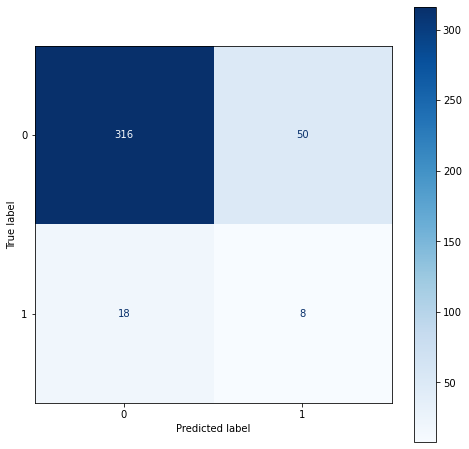

In [40]:
%%time

svc = SVC(random_state=RS)
SVM_pipe1 = Pipeline([('trans',Trans),('scaler',Scaler),('pca',Pca),('smt', Smot), ('svc', svc)])

params = {'gamma': [0.01, 0.001, 0.0001],
          'C': [1.0, 10, 100],
          'kernel': ['rbf', 'poly']}

num_folds = 5
seed = 7

stratified_kfold = StratifiedKFold(n_splits = num_folds, random_state = RS, shuffle=True)

new_params = {'svc__'+ key: params[key] for key in params}
grid_imba = GridSearchCV(SVM_pipe1, param_grid=new_params, cv=stratified_kfold, scoring='f1',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

give_scores('svc-pca',grid_imba,X_train, X_test, y_train, y_test)

### 1.2 SVM Classifier Without PCA

CV score:  0.1548

Train Accuracy scores:  0.8706

Test Accuracy scores:  0.8214

Classification reports of train and test set, respectively svc


,precision,recall,f1-score,support
0,0.999,0.862,0.926,1097.000
1,0.338,0.987,0.503,78.000
accuracy,0.871,0.871,0.871,0.871
macro avg,0.668,0.925,0.714,1175.000
weighted avg,0.955,0.871,0.898,1175.000
,precision,recall,f1-score,support
0,0.965,0.839,0.898,366.000
1,0.203,0.577,0.300,26.000
accuracy,0.821,0.821,0.821,0.821
macro avg,0.584,0.708,0.599,392.000


Wall time: 10min 7s


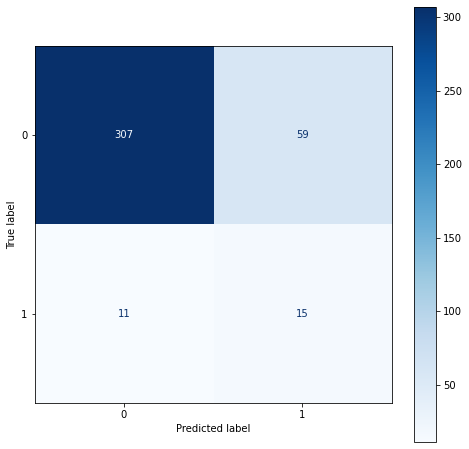

In [41]:
%%time

svc = SVC(random_state=RS)
SVM_pipe2 = Pipeline([('trans',Trans),('minmax',MinMax),('smt', Smot), ('svc', svc)])

params = {'gamma': [0.01, 0.001, 0.0001],
          'C': [1.0, 10, 100],
          'kernel': ['rbf', 'poly']}

num_folds = 5
seed = 7

stratified_kfold = StratifiedKFold(n_splits = num_folds, random_state = RS, shuffle=True)

new_params = {'svc__'+ key: params[key] for key in params}
grid_imba1 = GridSearchCV(SVM_pipe2, param_grid=new_params, cv=stratified_kfold, scoring='f1',
                        return_train_score=True)
grid_imba1.fit(X_train, y_train);

give_scores('svc',grid_imba1,X_train, X_test, y_train, y_test)

### 2.1. xgboost Classifier With PCA

CV score:  0.0954

Train Accuracy scores:  1.0

Test Accuracy scores:  0.9286

Classification reports of train and test set, respectively xgb-pca


,precision,recall,f1-score,support
0,1.0,1.0,1.0,1097.0
1,1.0,1.0,1.0,78.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1175.0
weighted avg,1.0,1.0,1.0,1175.0
,precision,recall,f1-score,support
0,0.940,0.986,0.963,366.000
1,0.375,0.115,0.176,26.000
accuracy,0.929,0.929,0.929,0.929
macro avg,0.658,0.551,0.570,392.000


Wall time: 3min 23s


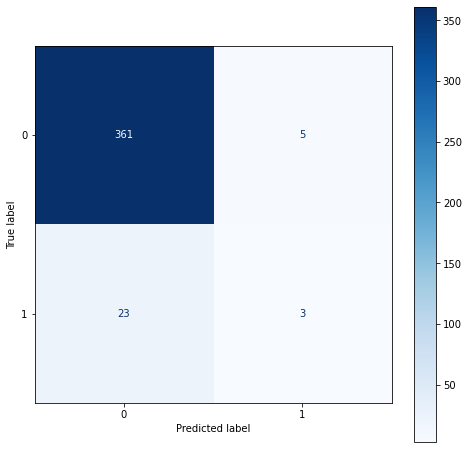

In [42]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

xgb_model = XGBClassifier(random_state=RS, eval_metric='mlogloss')
##### since xgboost is robust to outliers, transformation is not required
xgb_pipe = Pipeline([('scaler',Scaler),('pca',Pca),('smt', Smot),('xgb', xgb_model)])

params = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


num_folds = 5
seed = 7

stratified_kfold = StratifiedKFold(n_splits = num_folds, random_state = RS, shuffle=True)

new_params = {'xgb__'+ key: params[key] for key in params}

rand_imba = RandomizedSearchCV(xgb_pipe, param_distributions = new_params, cv = stratified_kfold, n_iter = 5, scoring = 'f1', return_train_score=True)
rand_imba.fit(X_train,y_train)

# xgb_pipe.fit(X_train,y_train)

give_scores('xgb-pca', rand_imba, X_train, X_test, y_train, y_test)

XGB classifier with PCA overfits

### 2.2. xgboost Classifier Without pca

CV score:  0.2023

Train Accuracy scores:  1.0

Test Accuracy scores:  0.9235

Classification reports of train and test set, respectively xgb


,precision,recall,f1-score,support
0,1.0,1.0,1.0,1097.0
1,1.0,1.0,1.0,78.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1175.0
weighted avg,1.0,1.0,1.0,1175.0
,precision,recall,f1-score,support
0,0.944,0.975,0.960,366.000
1,0.357,0.192,0.250,26.000
accuracy,0.923,0.923,0.923,0.923
macro avg,0.651,0.584,0.605,392.000


Wall time: 4min 36s


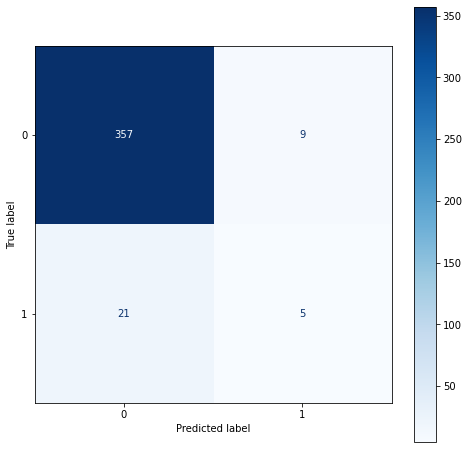

In [43]:
%%time

xgb = XGBClassifier(random_state=RS, eval_metric='mlogloss')
xgb_pipe2 = Pipeline([('smt', Smot),('xgb', xgb)])

params = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


num_folds = 5
seed = 7

stratified_kfold = StratifiedKFold(n_splits = num_folds, random_state = RS, shuffle=True)

new_params = {'xgb__'+ key: params[key] for key in params}

rand_imba = RandomizedSearchCV(xgb_pipe2, param_distributions = new_params, cv = stratified_kfold, n_iter = 5, scoring = 'f1', return_train_score=True)
rand_imba.fit(X_train,y_train)

rand_imba.fit(X_train,y_train)

give_scores('xgb',rand_imba,X_train, X_test, y_train, y_test)

XGB classifier without PCA overfits

### 3.1 Logistic regression with pca

CV score:  0.1844

Train Accuracy scores:  0.8145

Test Accuracy scores:  0.7781

Classification reports of train and test set, respectively LR-pca


,precision,recall,f1-score,support
0,0.986,0.813,0.891,1097.000
1,0.241,0.833,0.374,78.000
accuracy,0.814,0.814,0.814,0.814
macro avg,0.613,0.823,0.632,1175.000
weighted avg,0.936,0.814,0.857,1175.000
,precision,recall,f1-score,support
0,0.976,0.781,0.868,366.000
1,0.192,0.731,0.304,26.000
accuracy,0.778,0.778,0.778,0.778
macro avg,0.584,0.756,0.586,392.000


Wall time: 8.49 s


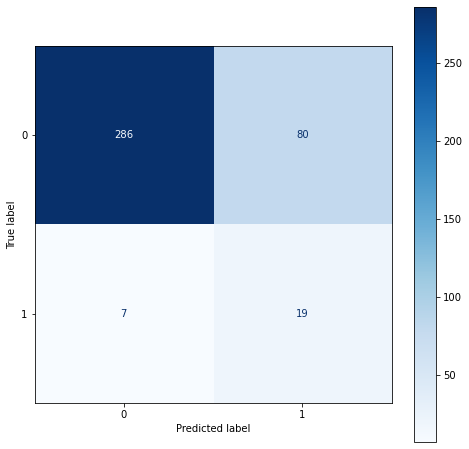

In [44]:
%%time

LR_cv = LogisticRegressionCV( scoring = 'f1', random_state=RS, class_weight='balanced',
                              verbose=0, n_jobs=-1, max_iter=10000)
LR_model1 = Pipeline([('trans',Trans),('scaler',Scaler),('pca',Pca),('LR', LR_cv)])
LR_model1.fit(X_train,y_train)

give_scores('LR-pca',LR_model1,X_train, X_test, y_train, y_test)

### 3.2 Logistic regression without pca and scaling

CV score:  0.2021

Train Accuracy scores:  0.8579

Test Accuracy scores:  0.7755

Classification reports of train and test set, respectively LR


,precision,recall,f1-score,support
0,0.999,0.849,0.918,1097.000
1,0.317,0.987,0.480,78.000
accuracy,0.858,0.858,0.858,0.858
macro avg,0.658,0.918,0.699,1175.000
weighted avg,0.954,0.858,0.889,1175.000
,precision,recall,f1-score,support
0,0.963,0.790,0.868,366.000
1,0.163,0.577,0.254,26.000
accuracy,0.776,0.776,0.776,0.776
macro avg,0.563,0.683,0.561,392.000


Wall time: 16 s


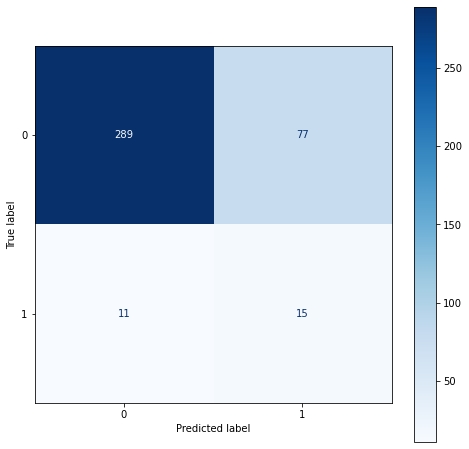

In [45]:
%%time

LR_cv = LogisticRegressionCV( scoring = 'f1', random_state=RS, class_weight='balanced',
                              verbose=0, n_jobs=-1, max_iter=10000)
LR_model2 = Pipeline([('trans',Trans),('LR', LR_cv)])
LR_model2.fit(X_train,y_train)

give_scores('LR',LR_model2,X_train, X_test, y_train, y_test)

Logistic regression without pca and scaling overfits

In [46]:
def plot_scores(df=None):
    global scores
    if df==None: df = scores
    fig, ax = plt.subplots(figsize=(10,15))
    colors = ['orange','green', 'blue', 'red', 'yellow']
    rectangles=[]
    N =len(df.columns)
    ind = np.arange(N)
    xlabels = df.columns
    width = 0.2       # the width of the bars
    ax.set_yticks(ind + width)
    ax.set_yticklabels(xlabels,fontsize=10)
    ax.set_ylabel("Models", fontsize=12)
    ax.set_xlabel("scores", fontsize=12)
    ax.set_title('f1 scores of minority class with different Models')
    def labelvalues(rects):
        for rect in rects:
            height = rect.get_width()*100
            ax.text(height/100, rect.get_y() + rect.get_height()/2., '{0:1.2f}'.format(height),va='center', ha='left')
    for i in range(df.shape[0]):
        rectangles.append(ax.barh(ind+width*i, df.iloc[i,:], width, color=colors[i]))
        labelvalues(rectangles[i])
    rect_leg = [item[0] for item in rectangles]
    rect_leg.reverse()
    scor = df.index.tolist()
    scor.reverse()
    ax.legend((rect_leg),(scor),bbox_to_anchor=(1.13, 1.01))
    plt.show()
    
    global cv_scores
    
    return

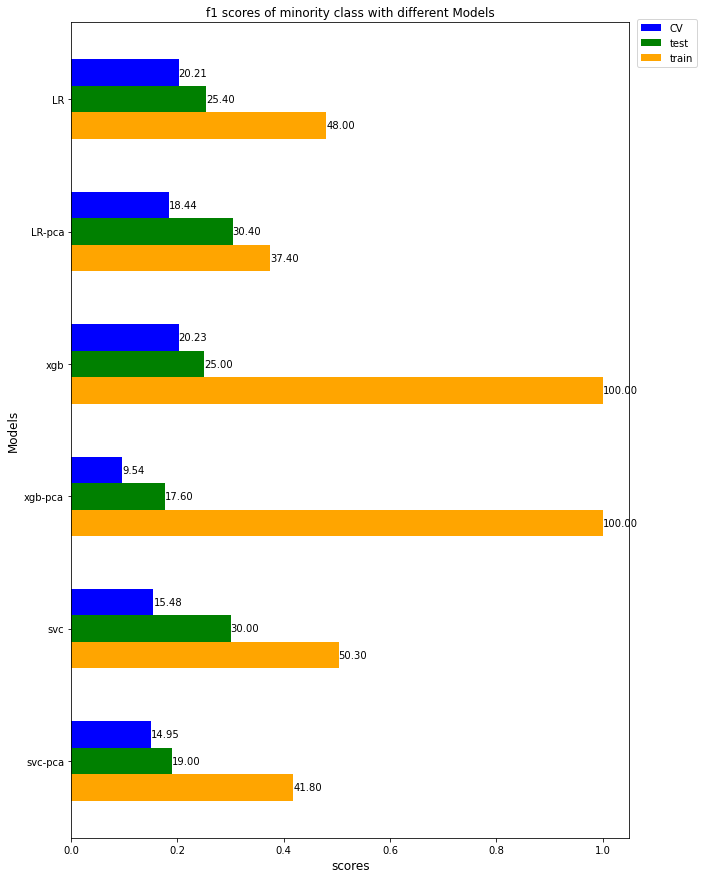

In [47]:
plot_scores()

### Selecting the final best model

Logistic regression with PCA and SVM Classifier Without PCA(both have equal scores) have the highest f1-scores for class 1(minority class) in test data when compared to other models. So we can choose any one of them as our final model.

When we consider the Cross validation f1-score, we can surely say that Logistic regression with PCA perform well in unseen data.Logistic regression with PCA also has the minimum standard deviation in CV f1-score.Therefore i am choosing Logistic regression with PCA as my final model.

### Pickling the final model

In [48]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(LR_model1, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results

In [49]:
Test_signal = (pd.read_excel('Future_predictions.xlsx')).to_csv('Future_predictions123.csv', index = None, header=True)

In [50]:
Test_signal  = pd.read_csv('Future_predictions123.csv')

In [51]:
Production_data = Test_signal[signal_X.columns]

In [52]:
Production_data = Production_data.replace(np.nan, 0)

#### Prediction of future data

In [53]:
loaded_model.predict(Production_data)

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

## Conclusion

The dataset contains lot of missing values in it. Some of the features had about 91% of missing values in them. Next time during data collection please try to collect the data as much as possible without any missing values. Also the dataset is highly imbalanced(imbalance ratio 14:1), try to collect the without any skewness. The model that i have built tend to perform more well on the majority class records, this is because of the data imbalance. XGB classifier overfits the training data. SVC consumes more time as it is compute intensive. I have chosen Logistic regression because it handles the data imbalance comparitively well and also it is less compute intense.

I have implemented pipeline, hyperparameter tuning, cross validation, Dimensionality reduction techniques in this project. 